# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). 

**~The structure of the directory should be:~**
```
ROOT
│
└───data
│   │
│   └───raw
│   |   │   
│   │   └───data_<TASK>
│   │   │   
│   │   └───<MONKEY>_<YYYYMMDD>_g<d>             
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.meta
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.bin   
│   │ 
│   └───processed
│   │   │   
│   │   └───data_<TASK>
│   │ 
│   └───_fractals
│       │   
│       └─── <YYYYMMDD>
│
└─── tasks
    │
    └───<EXPERIMENT>
        │   
        └─── <TASK>  
            │   
            └───<videos>     

```

**MACBOOK:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

**PC:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

In [23]:
# Move files from acquisition computer to Google Drive
!bash utilities/move_files.sh

Current directory is:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice
Target path is:
  data_Probabilistic_Reward_Airpuff_Choice/
Searching for Bear for 230928
  Moving : 230928_Bear_choice.h5
  Moved  : 230928_Bear_choice.h5
  Total number of files moved: 1
Fractal folder is: 20230928
  Copied fractal folder to all fractals folder
Done.


In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
from pprint import pprint
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict
# Custom classes
from classes.Session_Path import SessionPath
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# See tree branch above to set <ROOT>, <EXPERIMENT>
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabilistic_Reward_Airpuff_Choice' # Probabalistic_Airpuff_4x2 | Probabilistic_Reward_Airpuff_5x2 | Probabilistic_Reward_Airpuff_Choice

path_obj = SessionPath(ROOT, EXPERIMENT, TASK)

Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice
  Number of Total Files  : 122
  Monkey: Aragorn
    Number of Aragorn Files : 61
    Earliest Date    : 230523
    Most Recent Date : 230926
  Monkey: Bear
    Number of Bear Files : 48
    Earliest Date    : 230608
    Most Recent Date : 230928
Video Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos
Pulling '.h5' files...
  Complete: 115 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [2]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2023-09-28' #@param {type:"date"}
end_date = '2023-09-28' #@param {type:"date"}
monkey_input = 'Bear' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = False #@param {type:"boolean"}
save_df =  True #@param {type:"boolean"}
combine_dates =  True #@param {type:"boolean"}

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]


Files uploaded from processed folder

Pickled Files:
['230928_Bear_Probabilistic_Reward_Airpuff_5x2_behave.pkl']
Creating Session Objects...
Lick threshold: 3.77 mV
  Min Values (X,Y): (-98.172,-33.237)
  Max Values (X,Y): (108.878,132.294)
  Reward Mag: 1.0
    Reward Drops: 12.0
    Reward Frequency: 1.0
    Reward Length: 175.0
  Reward Mag: 0.5
    Reward Drops: 5.0
    Reward Frequency: 1.0
    Reward Length: 150.0
  Reward Mag: 0.0
    Reward Drops: 0.0
    Reward Frequency: 0.0
    Reward Length: 0.0
  Airpuff Mag: 1.0
    Airpuff Magnitude: 1.0
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.5
    Airpuff Magnitude: 0.5
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.0
    Airpuff Magnitude: 0.0
    Airpuff Frequency: 0.0
Looking for images from: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/_fractals/20230928
 Saving figures to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/figures/20230928_Bear
  _frac

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [3]:
pd.set_option('display.max_columns', None)
session_df_correct.head(5)

date  session_num subject  trial_num  block  condition  correct  error   
0  230928            0    Bear          1      1          1        1      0  \
1  230928            0    Bear          2      1          1        1      0   
2  230928            0    Bear          3      1          1        1      0   
3  230928            0    Bear          4      1          1        1      0   
4  230928            0    Bear          5      1          1        1      0   

   error_type                            behavioral_code_markers   
0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...  \
1           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
2           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
3           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
4           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   

                               behavioral_code_times stimuli_name_1 x_1_pos   
0  [2.435200003674254, 2799.8886999994284, 2875.4...     _fractal_D   [0.0]  \
1  [1464.8772000073222, 1566.9827000092482, 1599....     _fractal_B  [-5.0]   
2  [1499.45370000205, 1600.795599995763, 1633.868...     _fractal_C  [-5.0]   
3  [1690.3794000099879, 1794.3704000063008, 1827....     _fractal_A   [0.0]   
4  [1772.615299996687, 1878.945999997086, 1912.02...     _fractal_A   [0.0]   

  y_1_pos stimuli_name_2 x_2_pos y_2_pos  reward_1  reward_prob_1   
0   [0.0]     _fractal_D   [0.0]   [0.0]         0            0.0  \
1   [0.0]     _fractal_C   [5.0]   [0.0]         1            1.0   
2   [0.0]     _fractal_A   [5.0]   [0.0]         0            0.0   
3   [0.0]     _fractal_A   [0.0]   [0.0]         1            1.0   
4   [0.0]     _fractal_A   [0.0]   [0.0]         1            1.0   

   reward_mag_1  reward_drops_1  reward_length_1  reward_2  reward_prob_2   
0           0.0             0.0              0.0         0            0.0  \
1           0.5             5.0            150.0         0            0.0   
2           0.0            12.0            175.0         1            1.0   
3           1.0            12.0            175.0         0            0.0   
4           1.0            12.0            175.0         0            0.0   

   reward_mag_2  airpuff_1  airpuff_prob_1  airpuff_mag_1  airpuff_2   
0           0.0          1             1.0            1.0          0  \
1           0.0          0             0.0            0.0          1   
2           1.0          1             1.0            0.5          0   
3           0.0          0             0.0            0.0          0   
4           0.0          0             0.0            0.0          0   

   airpuff_prob_2  airpuff_mag_2   
0             0.0            0.0  \
1             1.0            0.5   
2             0.0            0.0   
3             0.0            0.0   
4             0.0            0.0   

                                               eye_x   
0  [1.6609441965697744, 1.6609040454671131, 1.678...  \
1  [-0.16569427888985078, -0.16569427888985078, -...   
2  [-1.8050734674899522, -1.8050734674899522, -1....   
3  [1.0635124506372193, 1.0495520858539902, 1.049...   
4  [-22.834869080386678, -22.834869080386678, -22...   

                                               eye_y   
0  [29.308782476051544, 29.31296644846858, 29.313...  \
1  [-13.537728763746786, -13.537728763746786, -13...   
2  [6.944260426672378, 6.944260426672378, 6.94426...   
3  [7.057846148049947, 7.058002951961979, 7.05800...   
4  [-4.118266322089829, -4.118266322089829, -4.07...   

                                           eye_pupil   
0  [5963.0, 5963.0, 5963.0, 5963.0, 5963.0, 5963....  \
1  [6159.0, 6159.0, 6160.0, 6160.0, 6160.0, 6160....   
2  [6799.0, 6799.0, 6800.0, 6800.0, 6800.0, 6800....   
3  [8646.0, 8640.0, 8640.0, 8640.0, 8640.0, 8635....   
4  [7538.0, 7538.0, 7538.0, 7538.0, 7538.0, 7538....   

                                                lick   
0  [0.0072398264486985275, 0.005595690320483099, ..

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

  perf_by_fractal.png saved.


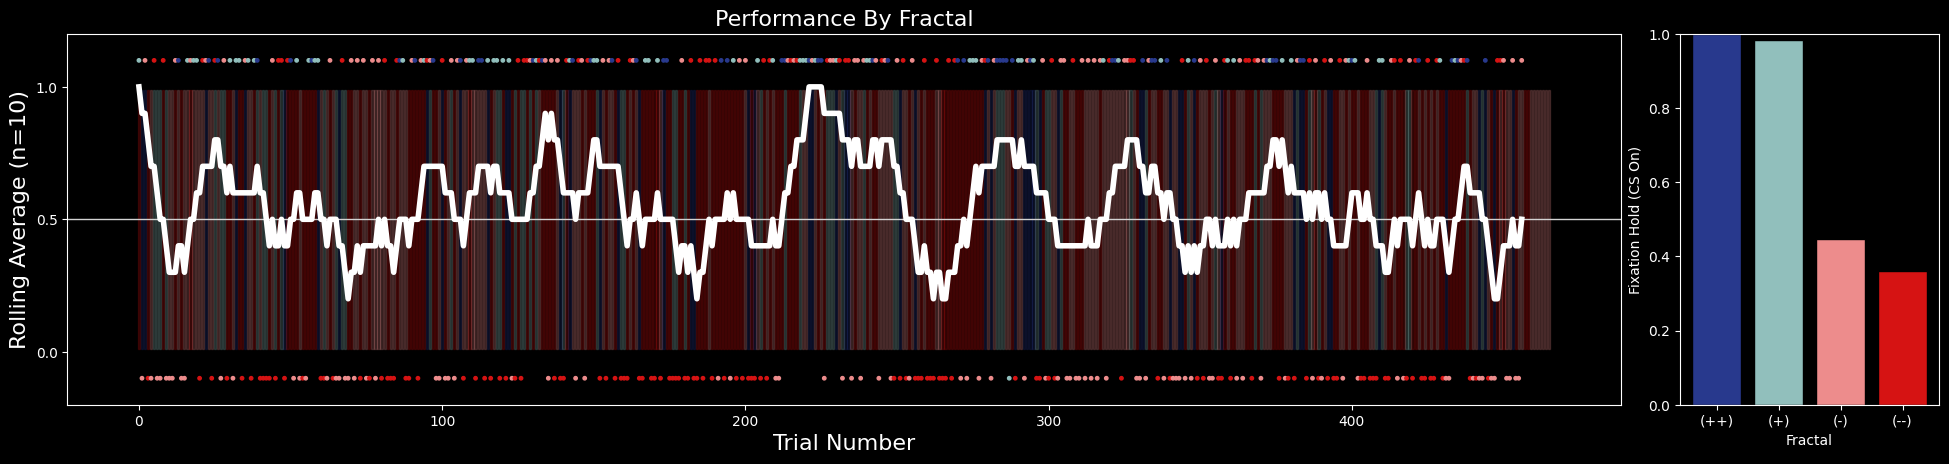

  session_latency.png saved.


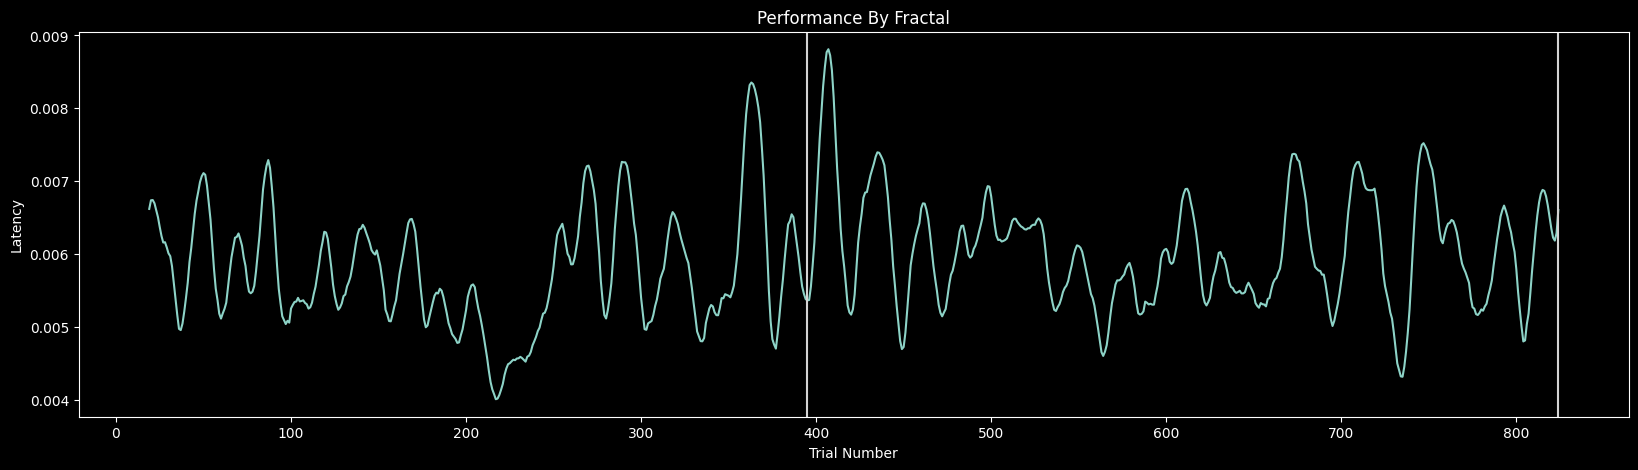

  epoch_hist.png saved.


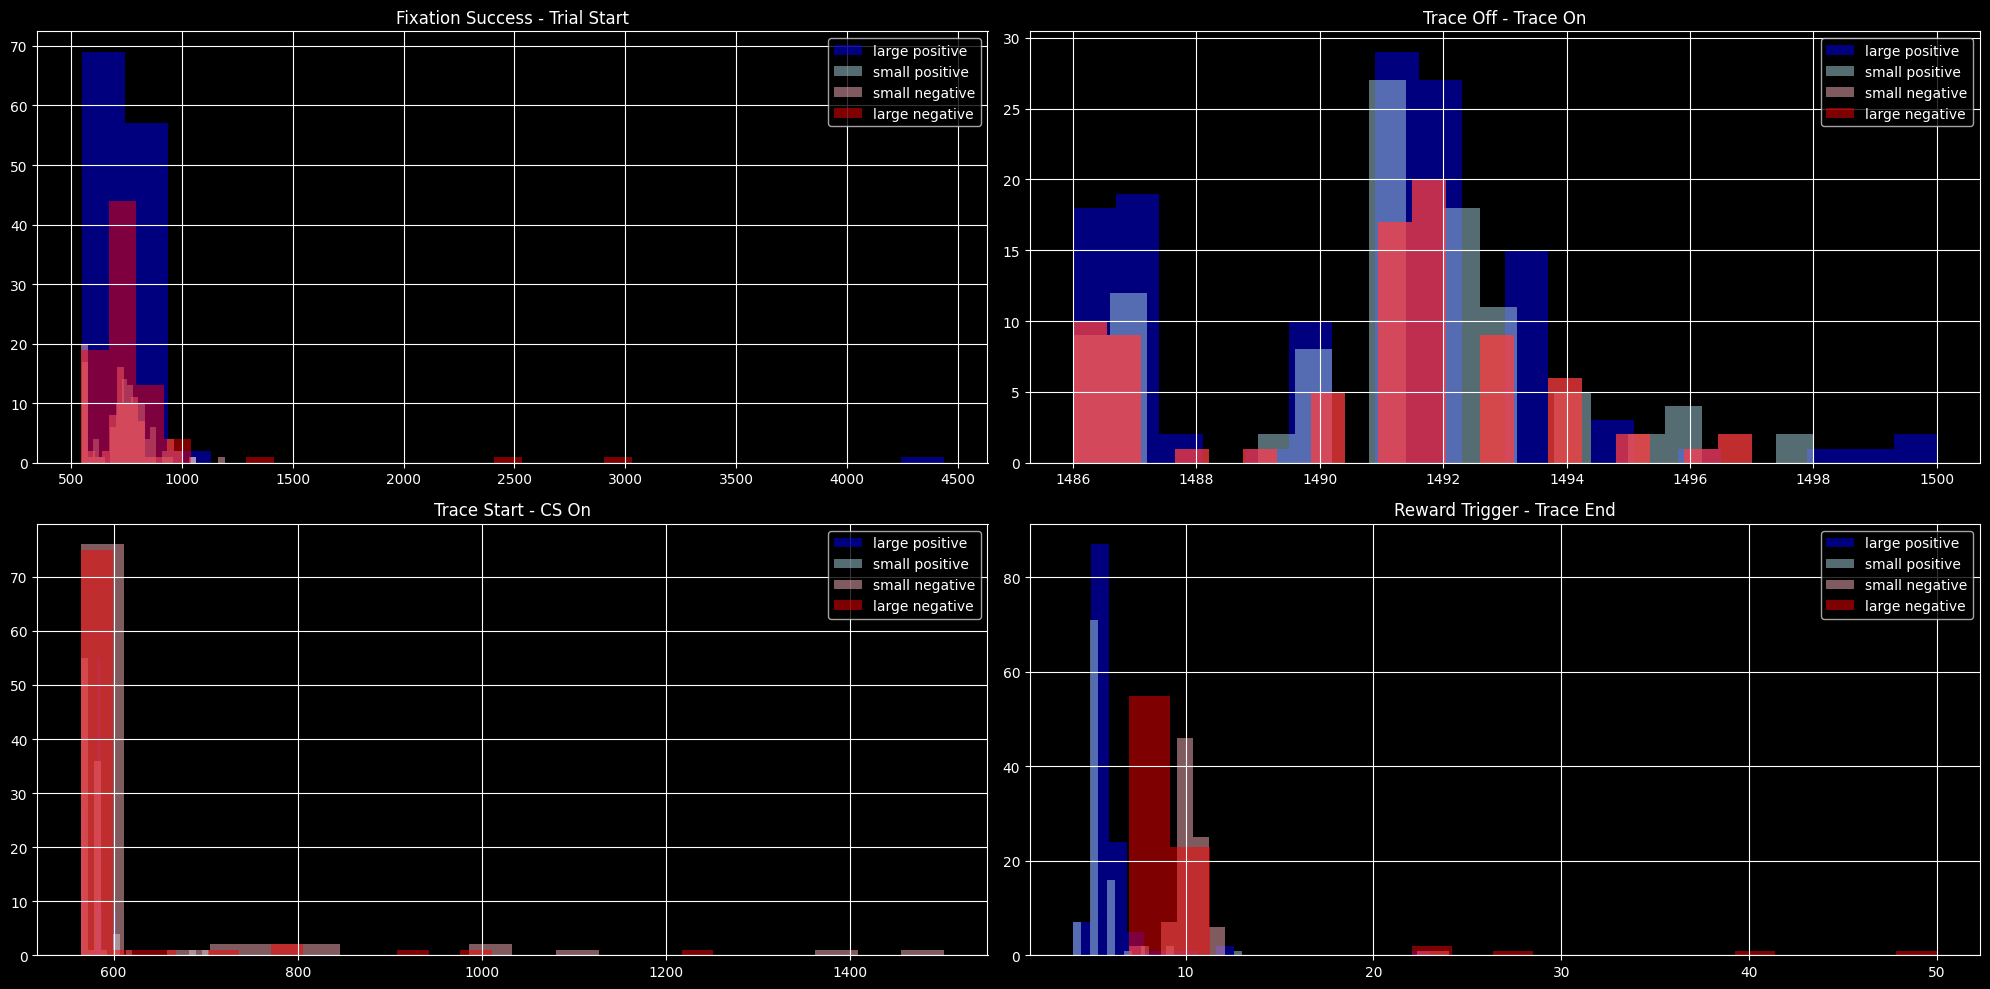

  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.svg saved.
  t_test_lick-duration_1.png saved.


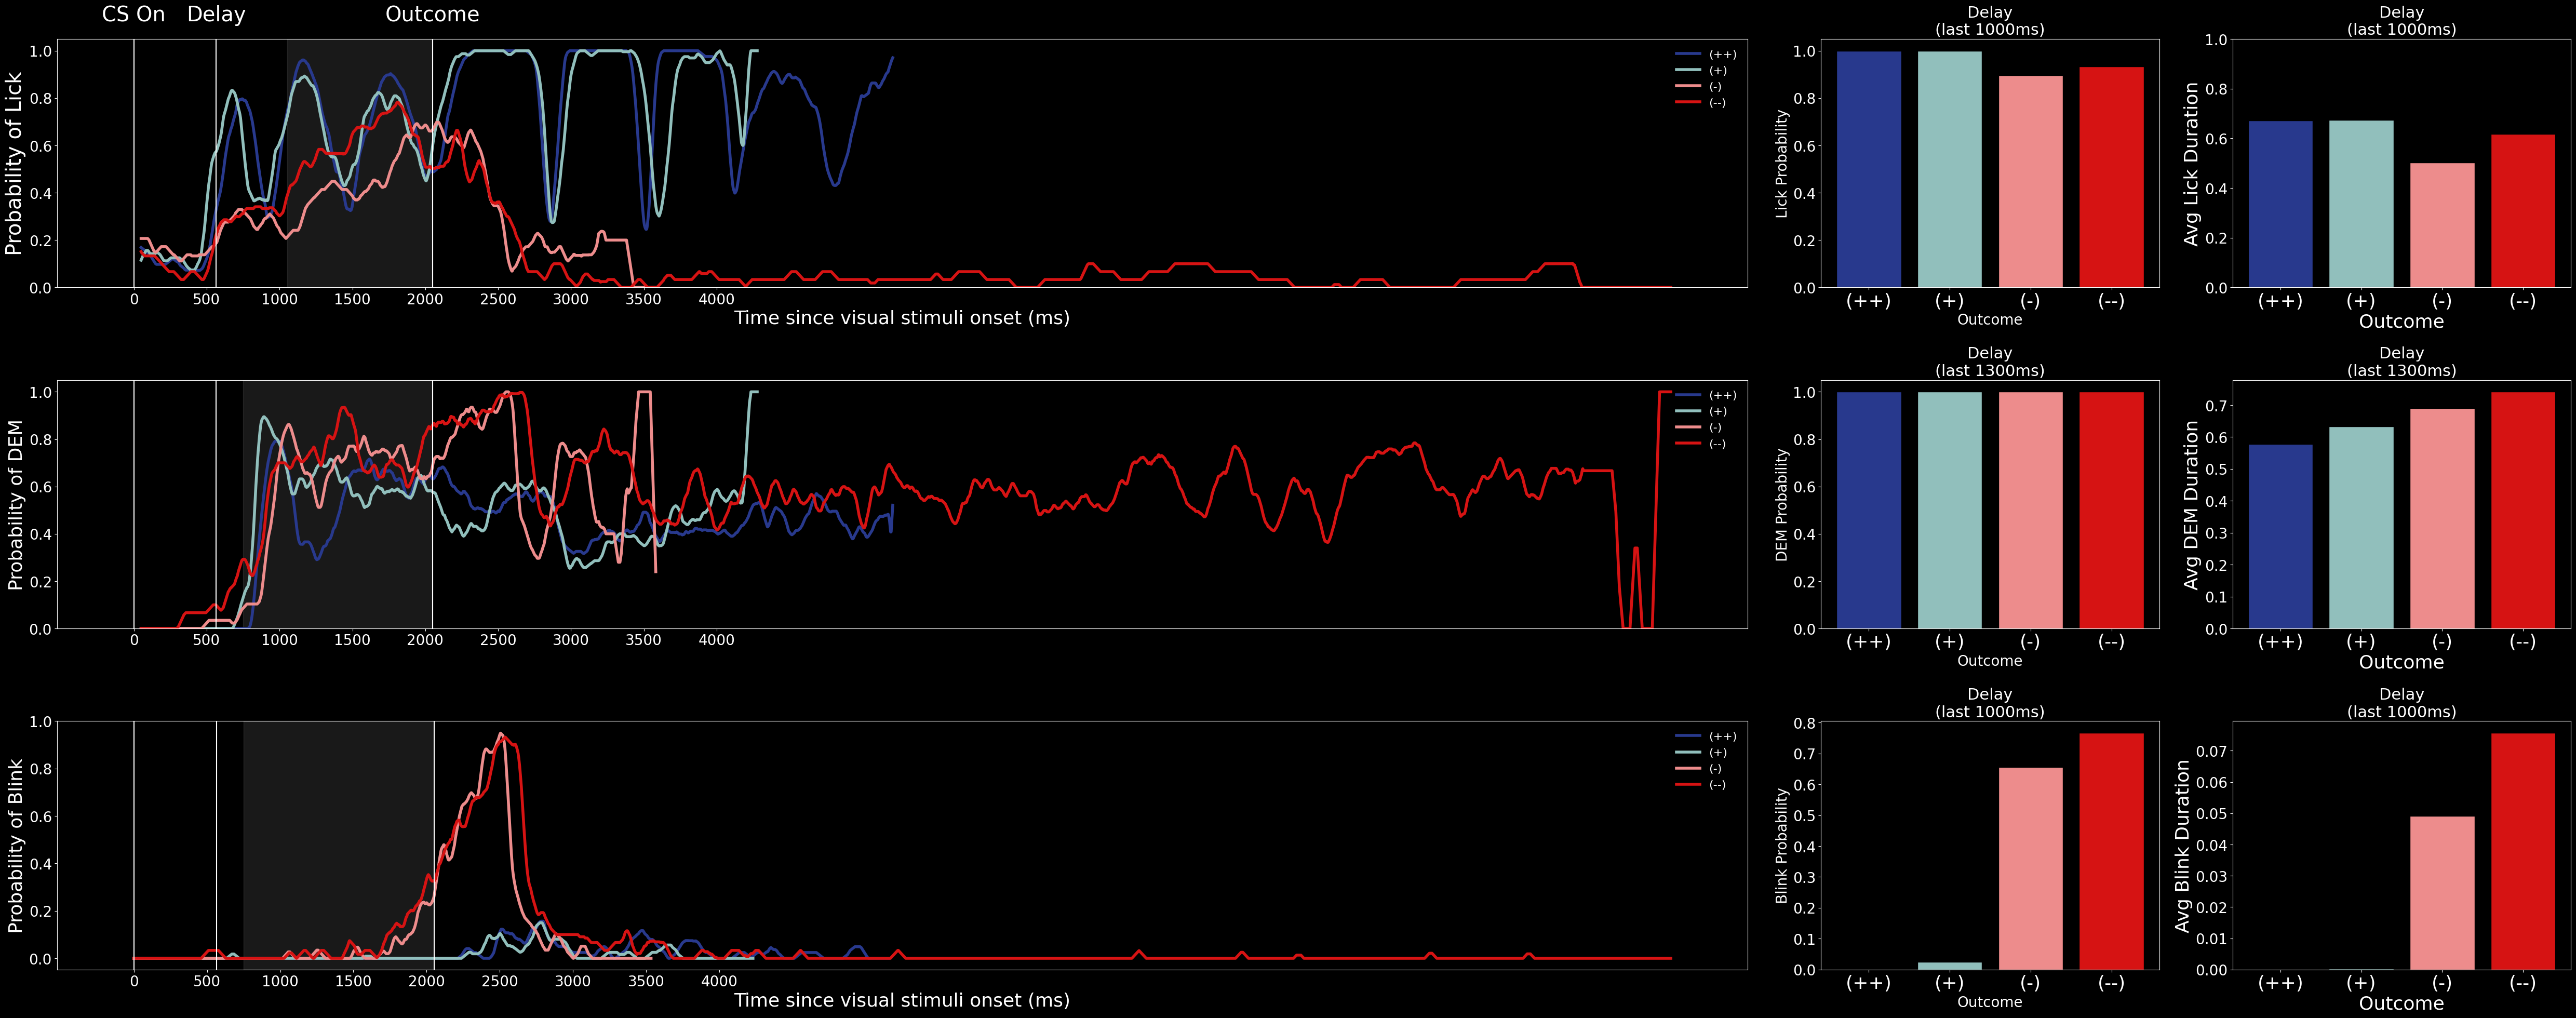

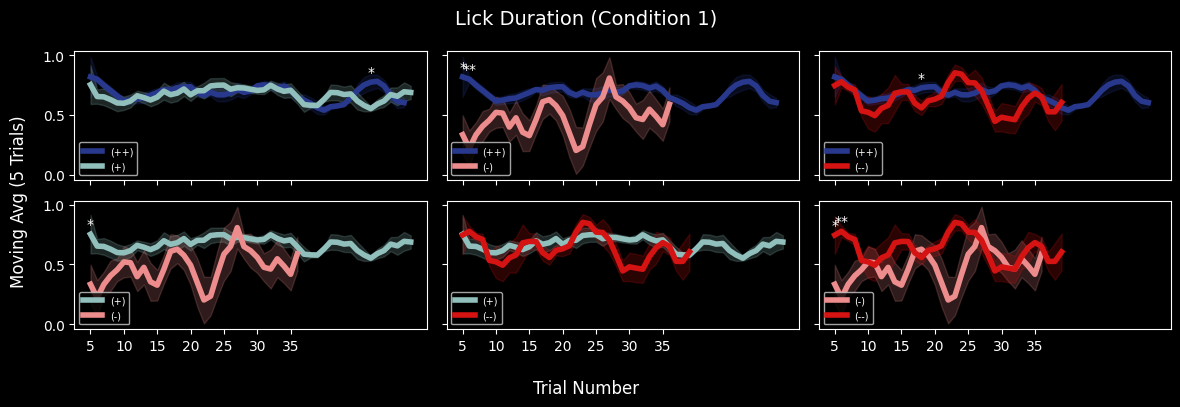

  t_test_DEM-duration_1.png saved.


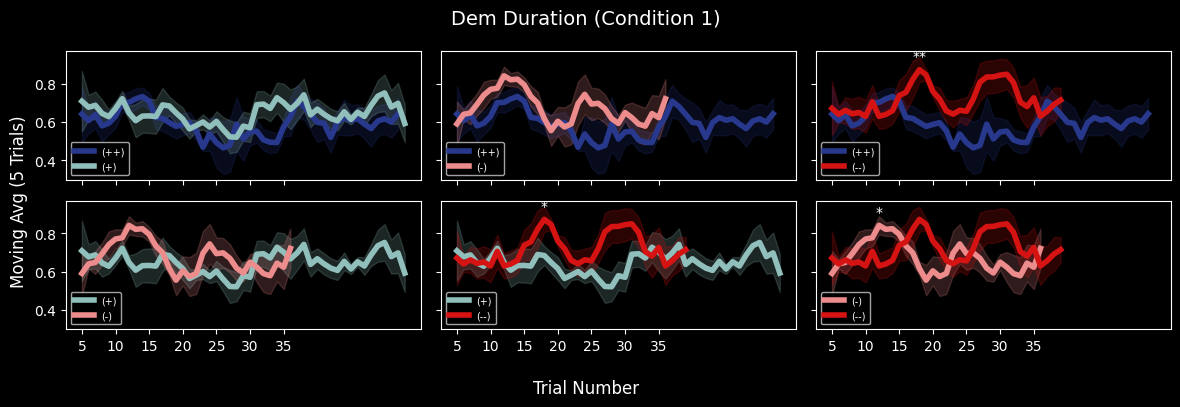

  t_test_blink-duration_1.png saved.


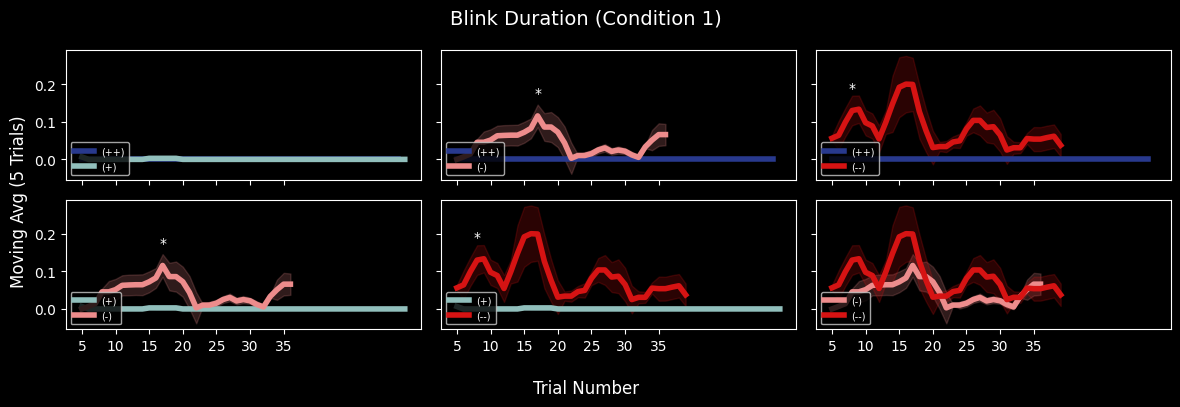

  raster_by_cond_2.svg saved.
  t_test_lick-duration_2.png saved.


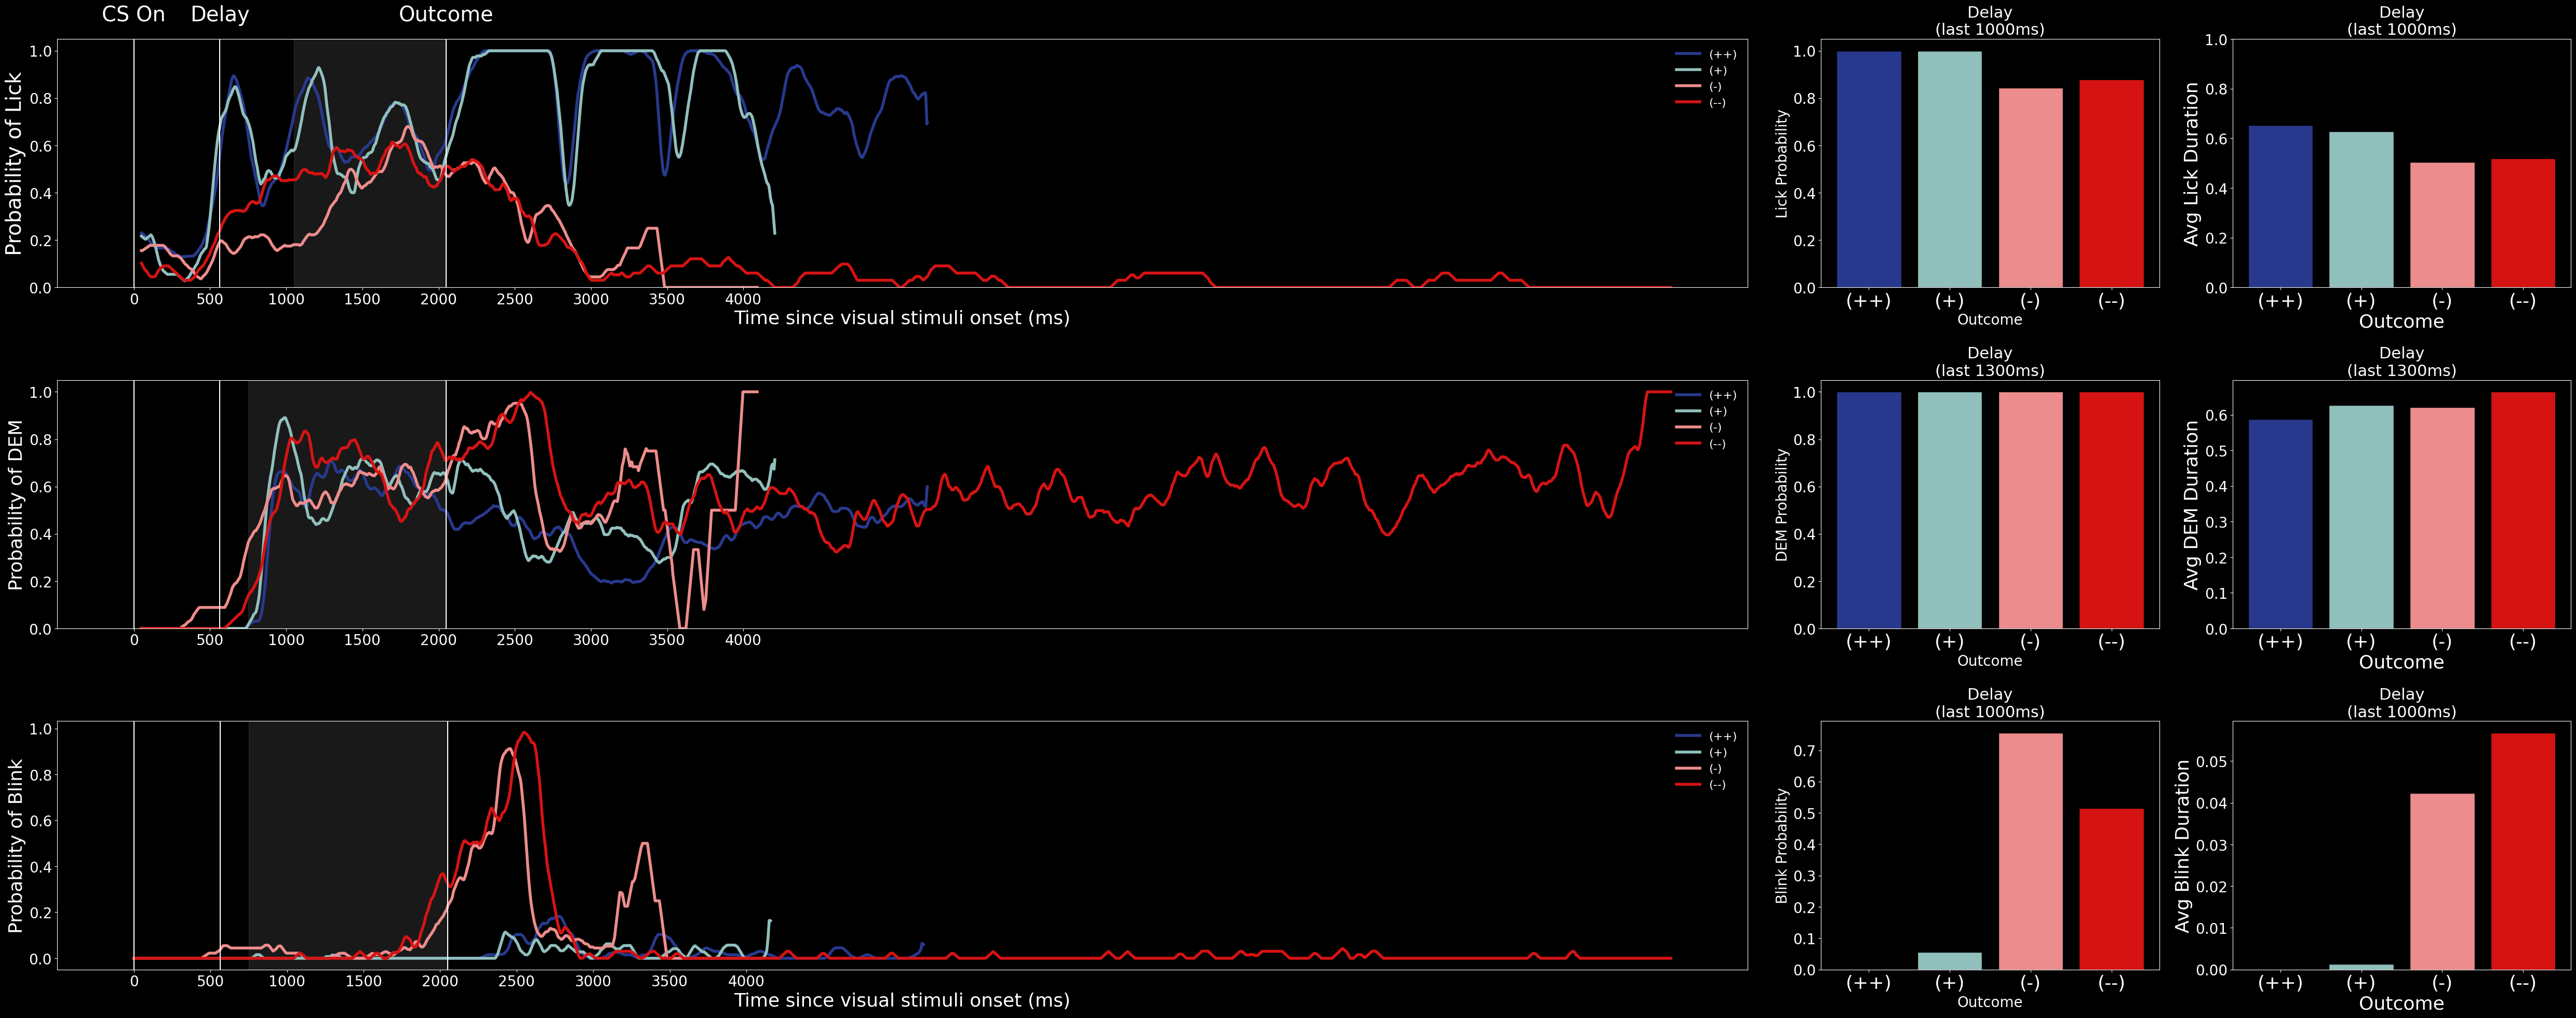

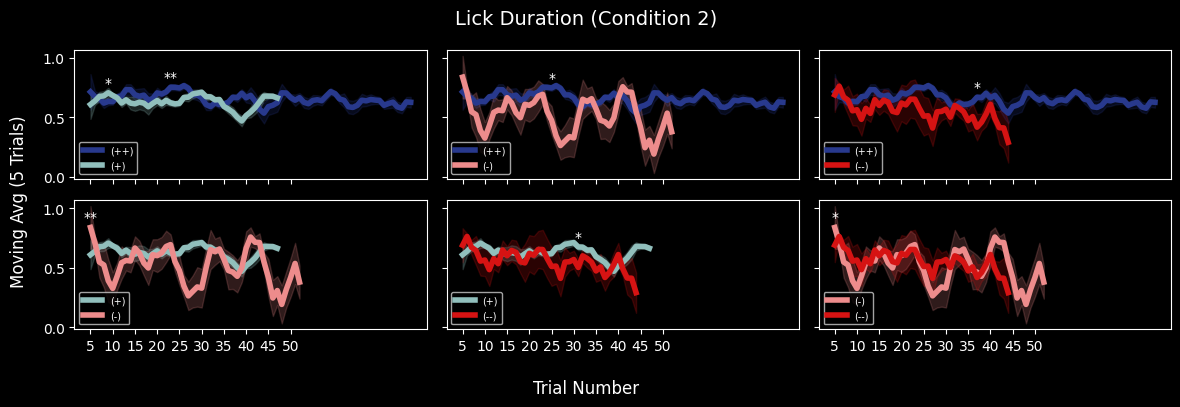

  t_test_DEM-duration_2.png saved.


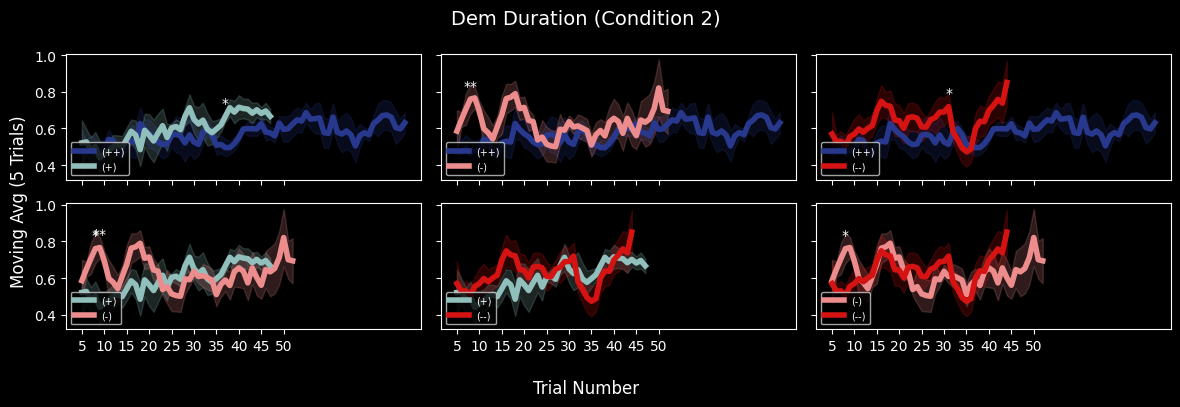

  t_test_blink-duration_2.png saved.


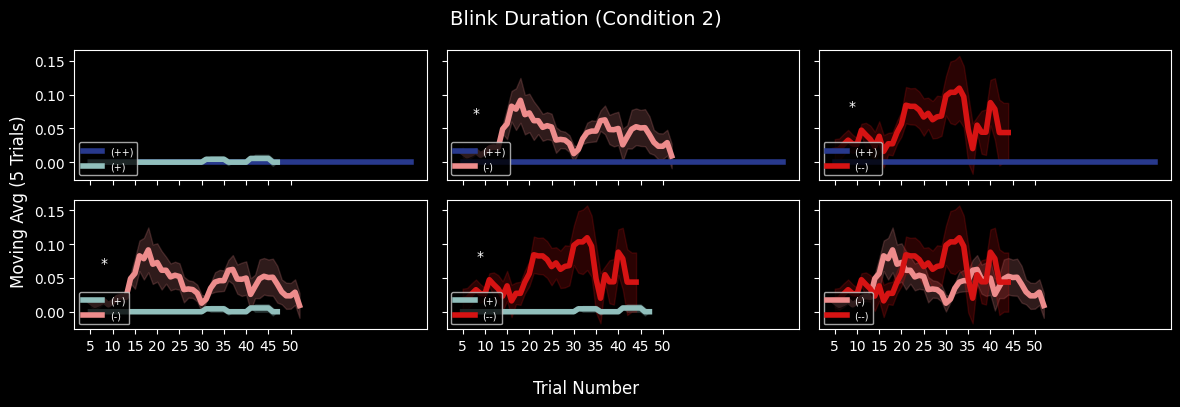

 [0.0, 0.5, 1.0] ANOVA 8.149 | P-value: 3.78E-04
  (0, 1) T-value: -3.322 P-value: 1.13E-03 |  Z-value: -2.604 P-value: 9.23E-03
    0 Lick Mean: 0.532 Lick Std: 0.304 Trials: 105
    1 Lick Mean: 0.642 Lick Std: 0.106 Trials: 56
  (0, 2) T-value: -3.649 P-value: 3.75E-04 |  Z-value: -3.261 P-value: 1.11E-03
    0 Lick Mean: 0.532 Lick Std: 0.304 Trials: 105
    2 Lick Mean: 0.649 Lick Std: 0.104 Trials: 79
  (1, 2) T-value: -0.386 P-value: 7.00E-01 |  Z-value: -0.387 P-value: 6.99E-01
    1 Lick Mean: 0.642 Lick Std: 0.106 Trials: 56
    2 Lick Mean: 0.649 Lick Std: 0.104 Trials: 79
  grant_lick.png saved.
 [0.0, 0.5, 1.0] ANOVA 3.062 | P-value: 4.87E-02
  (0, 1) T-value: -0.577 P-value: 5.66E-01 |  Z-value: -0.64 P-value: 5.22E-01
    0 DEM Mean: 0.619 DEM Std: 0.146 Trials: 135
    1 DEM Mean: 0.635 DEM Std: 0.189 Trials: 58
  (0, 2) T-value: -2.275 P-value: 2.62E-02 |  Z-value: -2.598 P-value: 9.38E-03
    0 DEM Mean: 0.619 DEM Std: 0.146 Trials: 135
    2 DEM Mean: 0.689 DEM Std: 

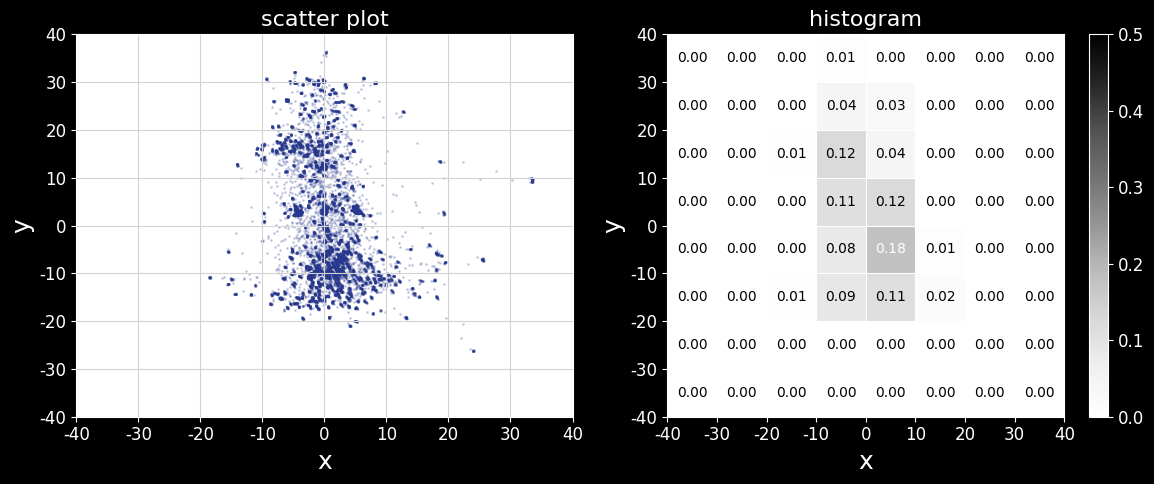

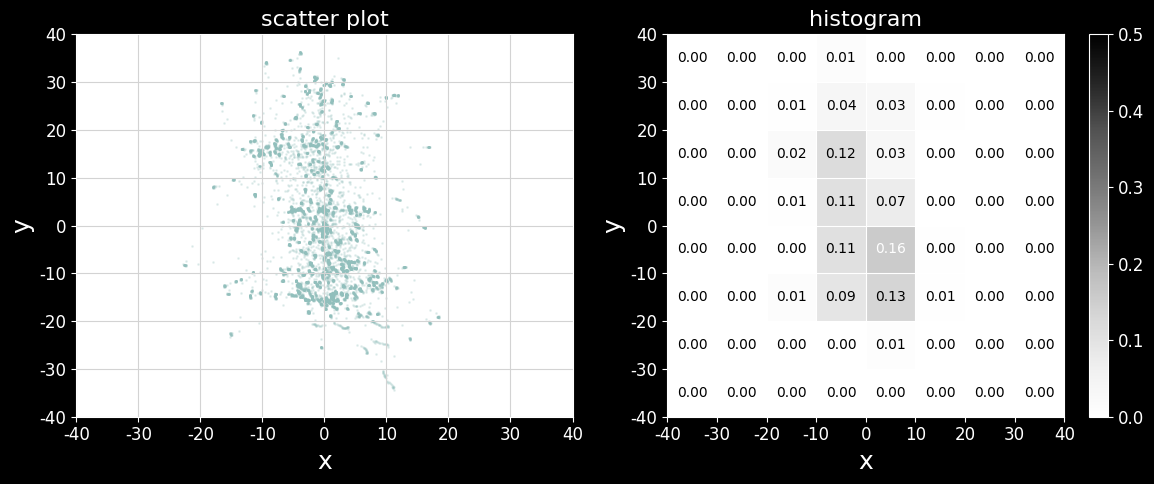

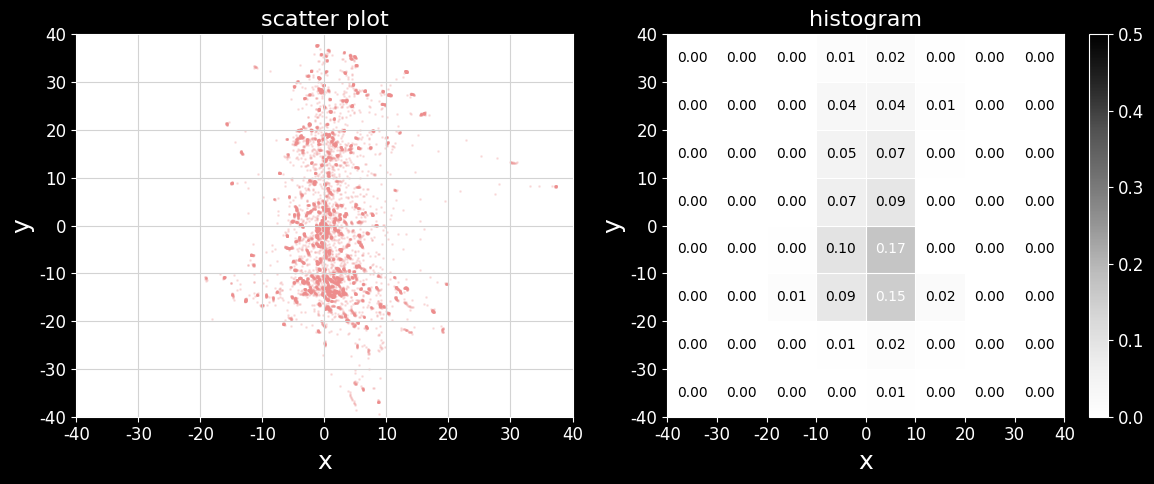

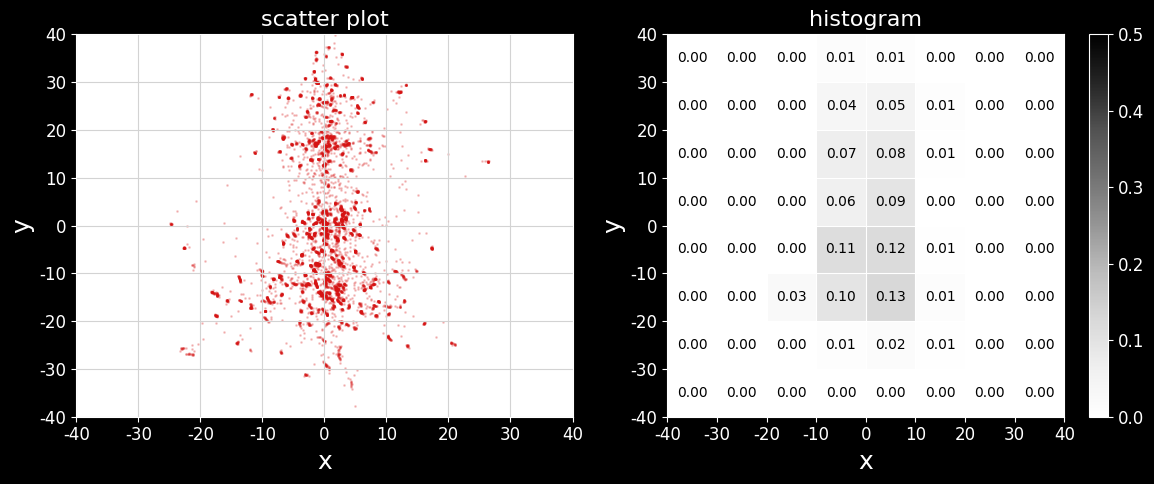

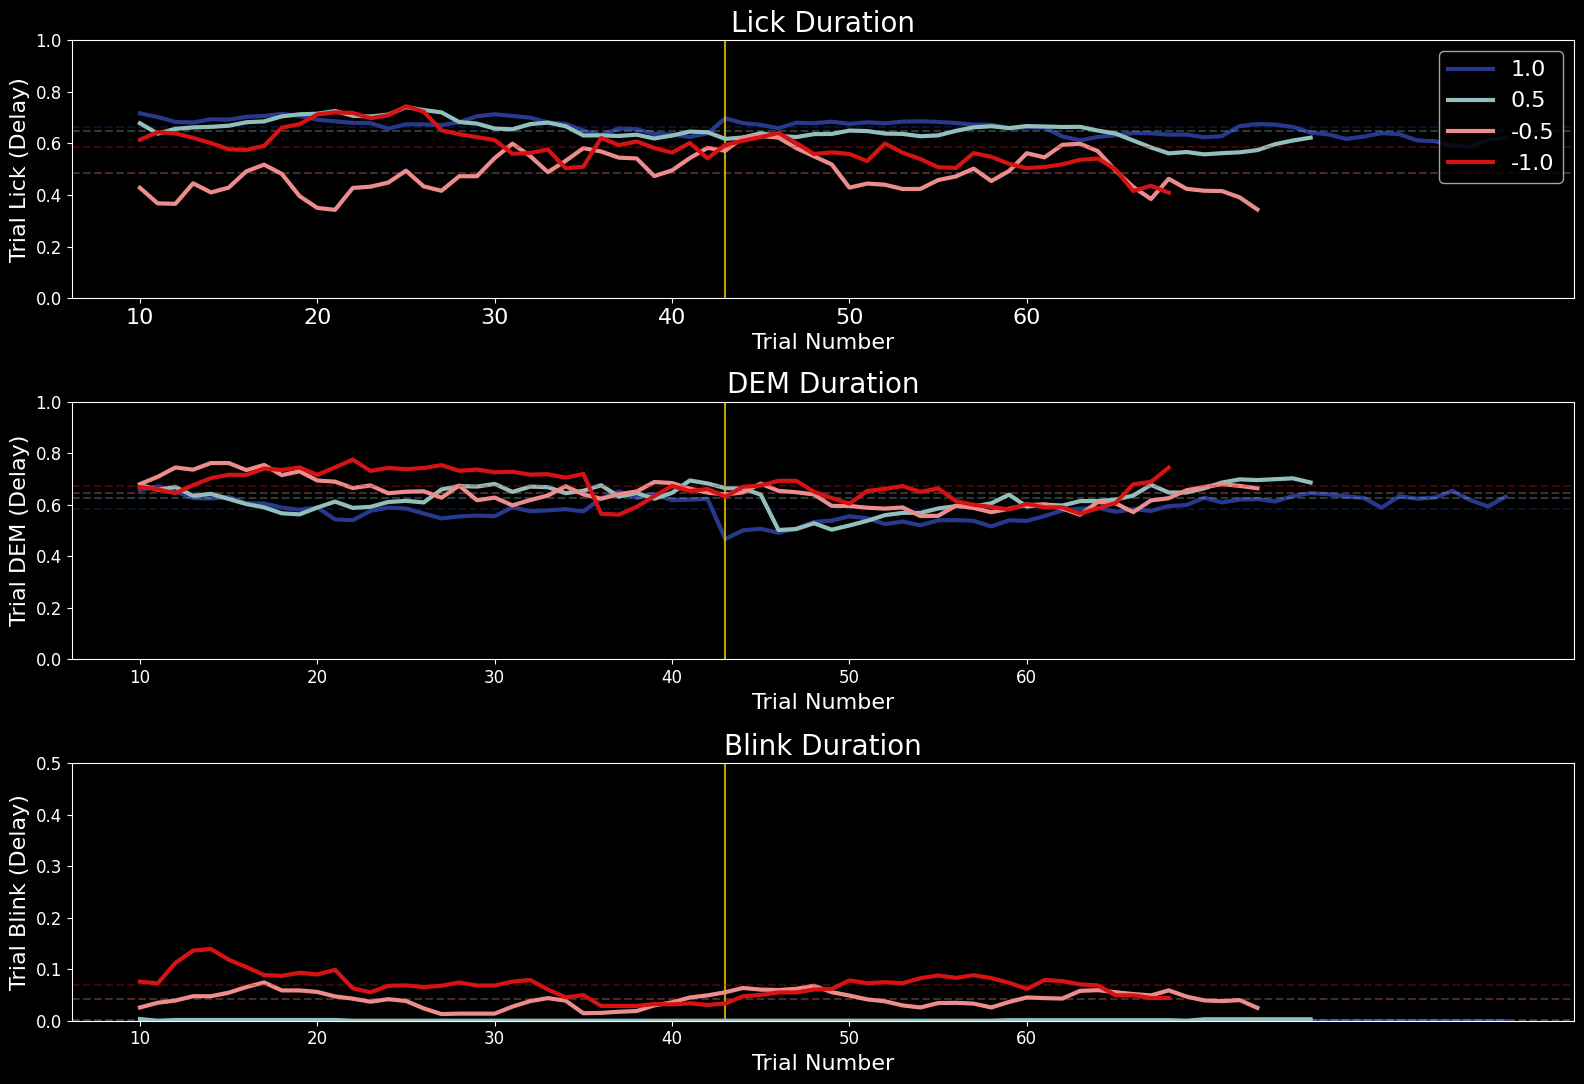

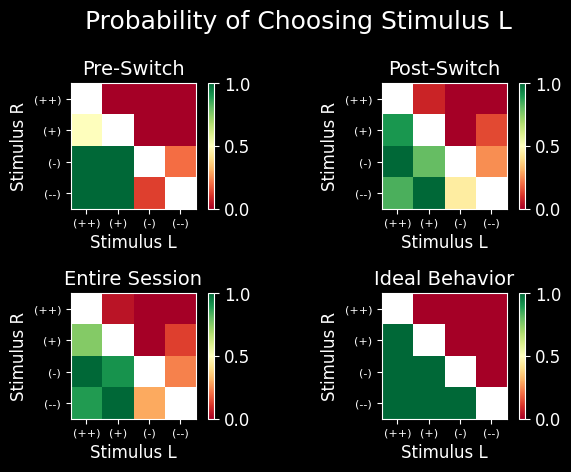

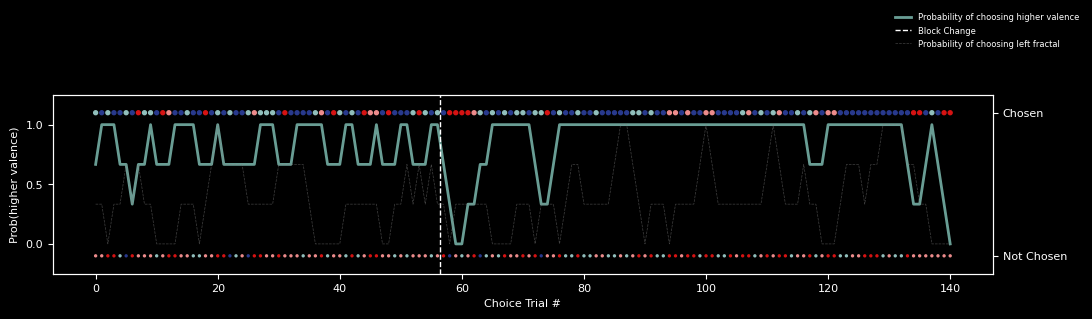


Generating session summary: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/markdowns
  Writing 20230928_Bear.md
Writing to excel...
  Writing 230928 to Emotion_Tracker.xlsx


In [31]:
plt.style.use('dark_background')

from analyses.run_functions import run_functions

# dates = [date for date in dates if date not in ['230607', '230609']]
dates = session_df['date'].unique()
for date in dates:
	session_df_date = session_df[session_df['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
														  behavioral_code_dict, error_dict)

***
## Valence Trial Performance
### Higher Valence and Reaction Time Performance on Choice Trials

In [4]:
from analyses import print_performance
print_performance.print_performance(session_df)
print('\n')
print_performance.reaction_time_choice(session_df)

Session Performance
 Percent successful reinforcement trials: 0.556 (259/466)
   Valence 1.0: 1.0 (58/58)
   Valence 0.5: 0.984 (63/64)
   Valence -0.5: 0.447 (72/161)
   Valence -1.0: 0.361 (66/183)
 Percent successful choice trials: 0.481 (141/293)
   Valence Pair [-1.0, 0.5]: 0.933 (14/15)
   Valence Pair [-1.0, 1.0]: 0.652 (15/23)
   Valence Pair [-0.5, 0.5]: 0.606 (20/33)
   Valence Pair [0.5, 1.0]: 0.594 (38/64)
   Valence Pair [-0.5, 1.0]: 0.453 (24/53)
   Valence Pair [-1.0, -0.5]: 0.286 (30/105)
 Percent left choice trials: 0.383 (54/141)
 Percent higher valence choice trials: 0.837 (118/141)
   Valence Pair [-0.5, 1.0]: 1.0 (24/24)
   Valence Pair [-0.5, 0.5]: 0.95 (19/20)
   Valence Pair [-1.0, 1.0]: 0.933 (14/15)
   Valence Pair [-1.0, 0.5]: 0.929 (13/14)
   Valence Pair [0.5, 1.0]: 0.868 (33/38)
   Valence Pair [-1.0, -0.5]: 0.5 (15/30)


Reaction Time on Choice Trials
 Valence: -1.0
   Reaction Time: 475.412
   Valence Not Chosen: -0.5 492.0 (15)
   Valence Not Chosen: 0.

In [33]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['valence'])\
              [['lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
valence                                                                     
-1.0          0.586576                  0.681305                 0.069079  \
-0.5          0.454000                  0.658675                 0.040769   
 0.5          0.639937                  0.641111                 0.001001   
 1.0          0.664241                  0.613647                 0.000000   

         blink_duration_window  eye_distance  
valence                                       
-1.0                  0.134965    186.947250  
-0.5                  0.105502    171.827390  
 0.5                  0.003358    119.581611  
 1.0                  0.000000    114.852572

In [34]:
session_df_reinforcement.groupby(['condition', 'fractal_chosen'])\
              [['valence', 'fractal_count_in_block', 'lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

valence  fractal_count_in_block  lick_duration   
condition fractal_chosen                                                   
1         _fractal_A          1.0               21.480000       0.685800  \
          _fractal_B          0.5               24.971429       0.657657   
          _fractal_C         -0.5               24.193548       0.439226   
          _fractal_D         -1.0               21.193548       0.672226   
2         _fractal_A         -0.5               32.000000       0.465171   
          _fractal_B         -1.0               28.571429       0.510714   
          _fractal_C          1.0               25.606061       0.647909   
          _fractal_D          0.5               26.571429       0.617786   

                          blink_duration_offscreen  pupil_raster_window_avg   
condition fractal_chosen                                                      
1         _fractal_A                      0.615631                 0.000000  \
          _fractal_B                      0.665451                 0.000396   
          _fractal_C                      0.697395                 0.045806   
          _fractal_D                      0.715409                 0.079007   
2         _fractal_A                      0.629400                 0.036961   
          _fractal_B                      0.651099                 0.060286   
          _fractal_C                      0.612145                 0.000000   
          _fractal_D                      0.610687                 0.001758   

                          blink_duration_window  eye_distance  
condition fractal_chosen                                       
1         _fractal_A                   0.000000    111.092938  
          _fractal_B                   0.002308    116.654219  
          _fractal_C                   0.105484    186.706167  
          _fractal_D                   0.149553    205.655729  
2         _fractal_A                   0.105516    160.577582  
          _fractal_B                   0.122044    170.376884  
          _fractal_C                   0.000000    117.700779  
          _fractal_D                   0.004670    123.240851

Block: 1
  Valence 1.0: Lick Correlation: -0.164 | Blink Correlation: nan
  Valence 0.5: Lick Correlation: -0.225 | Blink Correlation: -0.195
  Valence -0.5: Lick Correlation: 0.127 | Blink Correlation: -0.133
  Valence -1.0: Lick Correlation: -0.063 | Blink Correlation: -0.25
Block: 2
  Valence 1.0: Lick Correlation: -0.159 | Blink Correlation: 0.135
  Valence 0.5: Lick Correlation: -0.095 | Blink Correlation: 0.167
  Valence -0.5: Lick Correlation: -0.205 | Blink Correlation: -0.1
  Valence -1.0: Lick Correlation: -0.251 | Blink Correlation: -0.028


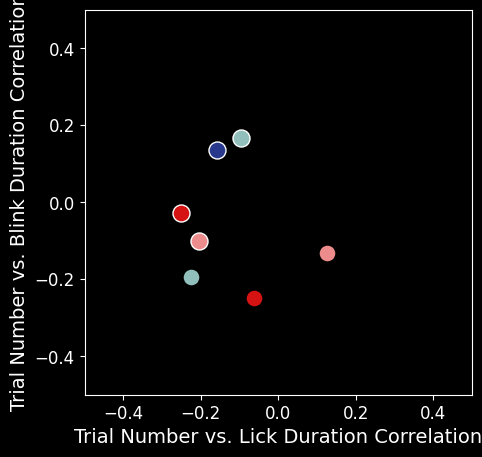

In [35]:
def trialno_lick_blink_correlation(df, session_obj):
  f, ax = plt.subplots(1, 1, figsize=(5, 5))
  df_threshold = df[df['fractal_count_in_block'] > 10]
  for block in df_threshold['condition'].unique():
    df_block = df_threshold[df_threshold['condition'] == block]
    print(f'Block: {block}')
    for valence in sorted(df_block['valence'].unique(), reverse=True):
      df_block_valence = df_block[df_block['valence'] == valence]
      trialno_lick_corr = round(df_block_valence['fractal_count_in_block'].corr(df_block_valence['lick_duration']), 3)
      trial_no_blink_corr = round(df_block_valence['fractal_count_in_block'].corr(df_block_valence['blink_duration_window']), 3)
      print(f'  Valence {valence}: Lick Correlation: {trialno_lick_corr} | Blink Correlation: {trial_no_blink_corr}')
      ec = 'black' if block == 1 else 'white'
      ax.scatter(trialno_lick_corr, trial_no_blink_corr, s=150,
                label=None, 
                color=session_obj.valence_colors[valence], ec=ec)
      ax.set_xlabel('Trial Number vs. Lick Duration Correlation', fontsize=14)
      ax.set_ylabel('Trial Number vs. Blink Duration Correlation', fontsize=14)
  ax.set_xlim(-0.5, 0.5)
  ax.set_ylim(-0.5, 0.5)
  plt.show()
    
trialno_lick_blink_correlation(session_df_correct, session_obj)

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [12]:
session_df_correct.loc[(session_df_correct['blink_in_window'] == 0) & 
											 (session_df_correct['eye_distance'] < 100) &
											 (session_df_correct['lick_duration'] > 0.75)]

Empty DataFrame
Columns: [date, session_num, subject, trial_num, block, condition, correct, error, error_type, behavioral_code_markers, behavioral_code_times, stimuli_name_1, x_1_pos, y_1_pos, stimuli_name_2, x_2_pos, y_2_pos, reward_1, reward_prob_1, reward_mag_1, reward_drops_1, reward_length_1, reward_2, reward_prob_2, reward_mag_2, airpuff_1, airpuff_prob_1, airpuff_mag_1, airpuff_2, airpuff_prob_2, airpuff_mag_2, eye_x, eye_y, eye_pupil, lick, cam_sync, cam_save, photodiode, trial_start, trial_end, trial_datetime_start, trial_datetime_end, reinforcement_trial, choice_trial, stim_chosen, stim_2_chosen, fractal_chosen, reward, reward_mag, airpuff, airpuff_mag, cam1_trial_name, cam2_trial_name, cam1_trial_time, cam2_trial_time, cam1_video, cam2_video, Start Trial, Fixation On, Fixation Success, CS On, Fixation Off, Trace Start, Trace End, Outcome Start, Reward Trigger, Airpuff Trigger, Outcome, Outcome End, Manual Reward, End Trial, valence, valence_1, valence_2, valence_not_chosen, lick_raster, DEM_raster, trial_bins, trial_in_block, fractal_count_in_block, lick_count_window, blink_count_window, pupil_data_window, pupil_raster, pupil_raster_window, pupil_raster_window_avg, pupil_binary_zero, blink_onset, blink_offset, blink_raster, blink_raster_window, blink_duration_window, pupil_pre_CS, lick_in_window, blink_in_window, lick_duration, blink_duration_sig, blink_duration_offscreen, eye_distance, cam_frames]
Index: []

### High DEM + Blink + Eye Movement / Low Lick Trials

In [44]:
session_df_correct.loc[(pd.isna(session_df_correct['Manual Reward']) == True) &
											 (session_df_correct['pupil_raster_window_avg'] > 0.2) &
											 (session_df_correct['blink_duration_offscreen'] > 0.30) &
											 (session_df_correct['eye_distance'] > 10) & 
											 (session_df_correct['lick_duration'] < 0.25)]

date  session_num subject  trial_num  block  condition  correct   
473   230919            1    Bear        474      2          2        1  \
1045  230919            1    Bear       1046      2          2        1   

      error  error_type                            behavioral_code_markers   
473       0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...  \
1045      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   

                                  behavioral_code_times stimuli_name_1   
473   [1465.6911000056425, 1535.8443000004627, 1568....     _fractal_B  \
1045  [1465.5876000033459, 1535.8917999983532, 1568....     _fractal_B   

     x_1_pos y_1_pos stimuli_name_2 x_2_pos y_2_pos  reward_1  reward_prob_1   
473    [0.0]   [0.0]     _fractal_B   [0.0]   [0.0]         0            0.0  \
1045   [0.0]   [0.0]     _fractal_B   [0.0]   [0.0]         0            0.0   

      reward_mag_1  reward_drops_1  reward_length_1  reward_2  reward_prob_2   
473            0.0             0.0              0.0         0            0.0  \
1045           0.0             0.0              0.0         0            0.0   

      reward_mag_2  airpuff_1  airpuff_prob_1  airpuff_mag_1  airpuff_2   
473            0.0          1             1.0            1.0          0  \
1045           0.0          1             1.0            1.0          0   

      airpuff_prob_2  airpuff_mag_2   
473              0.0            0.0  \
1045             0.0            0.0   

                                                  eye_x   
473   [-12.616371752243678, -12.24422876668472, -12....  \
1045  [-12.839604335543227, -12.839604335543227, -12...   

                                                  eye_y   
473   [26.501000926976484, 25.636963482151664, 25.63...  \
1045  [30.232807685447224, 30.232807685447224, 30.23...   

                                              eye_pupil   
473   [7562.0, 7577.0, 7577.0, 7592.0, 7592.0, 7625....  \
1045  [6035.0, 6024.0, 6016.0, 6016.0, 6005.0, 6005....   

                                                   lick   
473   [0.012172234822507039, 0.010528098699707306, 0...  \
1045  [0.00987044425008303, 0.008883962575105542, 0....   

                                               cam_sync   
473   [0.006910999223200209, 0.0003344546980039165, ...  \
1045  [3.323791914438004, 3.3283955036013264, 0.0065...   

                                               cam_save   
473   [3.330697298196643, 3.316557702969066, 3.31590...  \
1045  [3.322147775459917, 3.32017480869233, 3.329710...   

                                             photodiode   trial_start   
473   [2.175197372726799, 2.0640537492653905, 2.0801...  2.810792e+06  \
1045  [2.07391856749681, 2.085098694921886, 1.971982...  6.416878e+06   

         trial_end    trial_datetime_start      trial_datetime_end   
473   2.822893e+06 2023-09-19 13:29:30.517 2023-09-19 13:29:42.618  \
1045  6.436208e+06 2023-09-19 14:29:36.602 2023-09-19 14:29:55.932   

      reinforcement_trial  choice_trial  stim_chosen  stim_2_chosen   
473                     1             0            2              0  \
1045                    1             0            2              0   

     fractal_chosen  reward  reward_mag  airpuff  airpuff_mag   
473      _fractal_B       0         0.0        1          1.0  \
1045     _fractal_B       0         0.0        1          1.0   

      cam1_trial_name  cam2_trial_name  cam1_trial_time  cam2_trial_time   
473               NaN              NaN              NaN              NaN  \
1045              NaN              NaN              NaN              NaN   

      cam1_video  cam2_video  Start Trial  Fixation On Fixation Success CS On   
473          NaN         NaN         1535         1568             2253  2269  \
1045         NaN         NaN         1535         1568             9481  9497   

     Fixation Off Trace Start Trace End Outcome Start Reward Trigger   
473          2503        2853      4339     

In [29]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation -0.2
Lick vs. Blink Correlation -0.28
DEM vs. Blink Correlation 0.393
Pupil 0 vs. Blink Correlation 0.944


***
### Video Test

In [4]:
trial_specified = 10
session_df_correct[session_df_correct['trial_num'] == trial_specified]\
  [['reinforcement_trial', 'valence', 'fractal_chosen', 'reward_mag', 'airpuff_mag', 'lick_duration', 'blink_duration_offscreen', 'pupil_raster_window_avg', 'blink_duration_window']]


reinforcement_trial  valence fractal_chosen  reward_mag  airpuff_mag   
9                    1      0.5     _fractal_B         0.5          0.0  \

   lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
9            0.7                  0.620769                 0.152308  \

   blink_duration_window  
9               0.196923

***
## Single Trial Analysis

In [6]:
trial_selected = 23
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
session_df_selected[['correct',
  									 'valence',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
                  	 'blink_duration_window',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
										]]

correct  valence  lick_duration  blink_duration_sig   
22        1      0.0          0.727                 0.0  \

    blink_duration_offscreen  pupil_raster_window_avg  blink_duration_window   
22                  0.366923                      0.0                    0.0  \

    eye_distance Outcome Start Reward Trigger Airpuff Trigger  
22     54.042027          4535           <NA>            <NA>

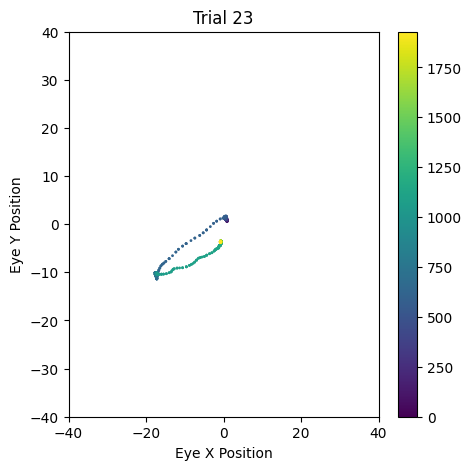

In [12]:
def plot_eye_single_trial(session_df, trial_num):
  # 3 figures, where the left one is twice as tall as the other two
  f, axarr = plt.subplots(1, 1, figsize=(5, 5))
  trial = session_df[session_df['trial_num'] == trial_num]
  trial_fix_off = trial['Fixation Off'].iloc[0]
  trial_eye_x = trial['eye_x'].tolist()[0][trial_fix_off:]
  trial_eye_y = trial['eye_y'].tolist()[0][trial_fix_off:]
  # show heat map
  plt.scatter(trial_eye_x, trial_eye_y, c=np.arange(len(trial_eye_x)), cmap='viridis', s=1)
  plt.colorbar()
  plt.xlim(-40, 40)
  plt.ylim(-40, 40)
  plt.title(f'Trial {trial_num}')
  plt.xlabel('Eye X Position')
  plt.ylabel('Eye Y Position')
  plt.show()

plot_eye_single_trial(session_df, trial_selected)

Total Eye Positions: 1500
Histogram Positions: 1500
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.176  0.     0.     0.    ]
 [0.     0.     0.     0.5    0.006  0.     0.     0.    ]
 [0.     0.     0.2933 0.0247 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 31.8%
outside x,y [-40, 40]: 0.0%
  eye_heatmap_0.0.png saved.


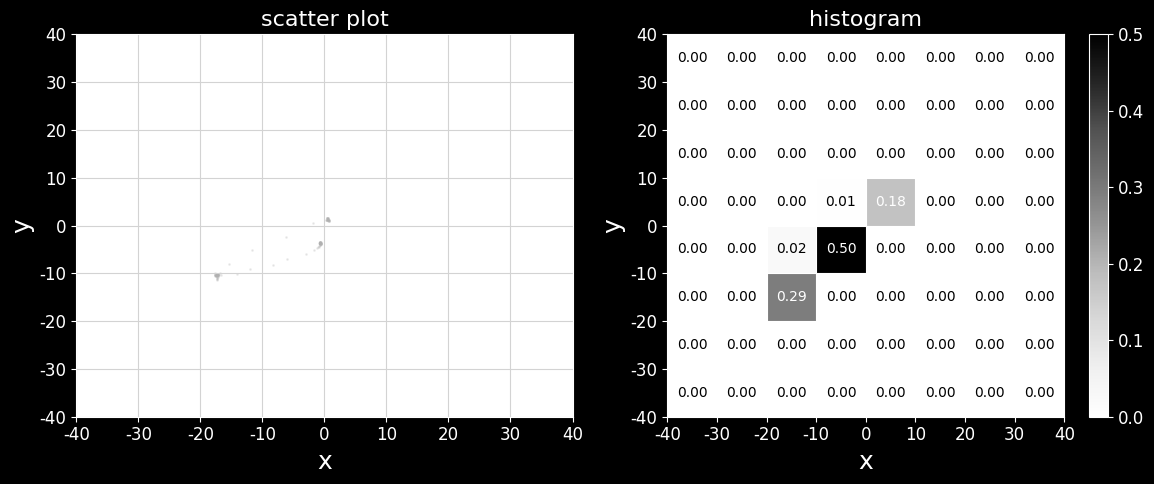

In [18]:
from analyses.eyetracking_analysis import eyetracking_analysis
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## SpikeGLX 

In [16]:
import re
import cv2
import math
from pathlib import Path
from spike_glx import read_SGLX
from classes.SpikeGLX import SpikeGLX

signal_dict = {
  0: 'cam_sync',
  1: 'cam_save',
  2: 'lick',
  3: 'photodiode',
  4: 'empty'
}



In [17]:
spikeglx_obj = SpikeGLX(path_obj, session_obj, session_obj.video_path, signal_dict)

Video Folders:
['230928_Bear_143539', '230928_Bear_143420', '230928_Bear_144536']
Number of cameras: 4
  Camera: e3v831b | Number of videos: 5
  Camera: e3v8360 | Number of videos: 5
  Camera: e3v83ad | Number of videos: 5
  Camera: e3v83d6 | Number of videos: 5
Camera: e3v831b
  Video: e3v831b-20230928T143418-145419.avi | Frames: 144122 | FPS: 120.0 | Length (minutes): 20.02  
  Video: e3v831b-20230928T145419-151419.avi | Frames: 144004 | FPS: 120.0 | Length (minutes): 20.0   
  Video: e3v831b-20230928T151419-153419.avi | Frames: 144005 | FPS: 120.0 | Length (minutes): 20.0   
  Video: e3v831b-20230928T153419-155419.avi | Frames: 144004 | FPS: 120.0 | Length (minutes): 20.0   
  Video: e3v831b-20230928T155419-155558.avi | Frames: 11882  | FPS: 120.0 | Length (minutes): 1.65   
  Total Frames: 588017
Camera: e3v8360
  Video: e3v8360-20230928T143418-145419.avi | Frames: 144123 | FPS: 120.0 | Length (minutes): 20.02  
  Video: e3v8360-20230928T145419-151419.avi | Frames: 144004 | FPS: 12

### See the raw data to validate
Just to make sure we captured the raw data from SpikeGLX, we're going to plot the first 10 seconds of data generated

In [18]:
# Visualize SpikeGLX channels
read_SGLX.plot_channels(spikeglx_obj, tStart=0, tEnd=10)

SpikeGLX object missing attributes (meta, chan_dict, signal_dict)


In [19]:
# get length of all cam_frames
def count_ML_cam_frames(session_df):
  cam_frames = session_df['cam_frames'].tolist()
  cam_frames_flatten = [item for sublist in cam_frames for item in sublist]
  print('Number of frames in ML Cam TTL: {}'.format(len(cam_frames_flatten)))

count_ML_cam_frames(session_df)
print('Number of frames in SpikeGLX Cam TTL: {}'.format(len(spikeglx_obj.cam_frames)))

Number of frames in ML Cam TTL: 587909
Number of frames in SpikeGLX Cam TTL: 588016


In [20]:
# manually assign the time epochs you care about
epochs = ['Start Trial', 'Fixation On', 'CS On',	
          'Trace Start', 'Outcome Start', 'End Trial']

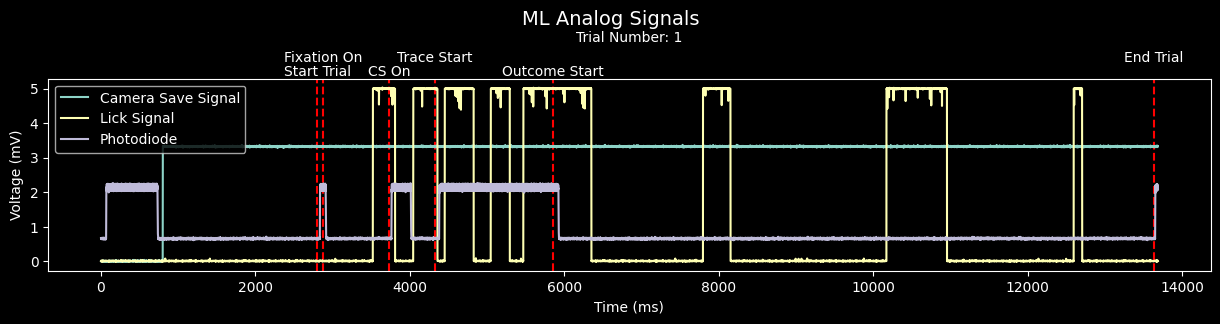

In [21]:
from spike_glx import read_SGLX
# black background for plots
read_SGLX.plot_analog_ML(session_df, epochs, trial_num=1)

In [22]:
def spikeglx_cam_frames_window(trial_num, spikeglx_cam_times, spikeglx_cam_framenumbers, col_start, col_end):
	"""
	Finds the first and last frame of the camera from SpikeGLX in a given window

	Parameters
	----------
	trial_num : int
		Trial number
	spikeglx_cam_times : defaultdict
		Dictionary of trial start/end times
	spikeglx_cam_framenumbers : defaultdict
		Dictionary of trial start/end frame numbers
	col_start : str
		Column name of start time
	col_end : str
		Column name of end time

	Returns
	-------
	spikeglx_cam_framenumbers : defaultdict
		Dictionary of trial start/end frame numbers
		
	"""
	try:
		spikeglx_frames_trial = [f_index for f_index,frame in enumerate(spikeglx_obj.cam_frames) if \
													  frame >= spikeglx_cam_times[trial_num][col_start] and \
														frame <= spikeglx_cam_times[trial_num][col_end]]
		spikeglx_cam_framenumbers[trial_num][col_start] = spikeglx_frames_trial[0]
		spikeglx_cam_framenumbers[trial_num][col_end] = spikeglx_frames_trial[-1]	
	# time epoch NaN (i.e. error before Trace Start)
	except:
		spikeglx_cam_framenumbers[trial_num][col_start] = np.nan
		spikeglx_cam_framenumbers[trial_num][col_end] = np.nan
	return spikeglx_cam_framenumbers

def time_to_samples(data_array, sample_rate, data_times, tStart, tEnd):
  '''
  Converts time in milliseconds to samples
  from sglx data array
  '''
  first_sample = int(sample_rate*tStart/1000)
  last_sample = int(sample_rate*tEnd/1000)
  data_array = data_array[first_sample:last_sample]
  data_times = data_times[first_sample:last_sample]
  return data_array, data_times

def align_ml_sglx_verbose(t_index, 
													trial_start_pd_ML,
													trial_end_pd_ML, 
													trial_len_pd_ML, 
													trial_start_ephys, 
													trial_end_ephys):
	"""Prints trial alignment information"""
	
	print(f'Trial Number: {t_index+1}')
	print('  ML:')
	print(f'  Photodiode Start : {trial_start_pd_ML}')
	print(f'  Photodiode End   : {trial_end_pd_ML}')
	print(f'  Trial Length     : {trial_len_pd_ML}')
	print('  SpikeGLX:')
	print(f'  Photodiode Start : {trial_start_ephys}')
	print(f'  Photodiode End   : {trial_end_ephys}')
	print(f'  Trial Length     : {trial_end_ephys-trial_start_ephys}')

def plot_pd_alignment(trial_specified, sglx_pd_times, sglx_pd_signal, 
											sglx_trial_times, sglx_cam_framenumbers, 
											offset, epochs):
	"""Plots MonkeyLogic and SpikeGLX photodiode signal for a given trial"""	
	trial_num = trial_specified['trial_num'] - 1
	# find the first and last frame of the camera from ML
	ml_cam_start = trial_specified['cam_frames'][0]
	ml_cam_end = trial_specified['cam_frames'][-1]
	ml_num_frames = len(trial_specified['cam_frames'])
	ml_pd = trial_specified['photodiode']*1000

	f, ax = plt.subplots(1, 1, figsize=(20, 3))
	if trial_num == 0:
		ax.plot(np.array(ml_pd), label='ML (raw)', color='blue') # x-axis mV to V
		ax.text(0, max(ml_pd)+300, 'SpikeGLX Start', ha='center', color='r')
		ax.axvline(x=0, color='r', linestyle='--')
	ax.plot(sglx_pd_times, sglx_pd_signal, label='sglx', color='green')
	# plot for verification
	ax.plot(np.arange(len(ml_pd))+offset, 
					(np.array(ml_pd))+100, 
					alpha=0.5,
					label='ML (x-aligned, y-offset)',
					color='purple')

	ax.axvline(x=offset, color='r', linestyle='--')
	ax.text(offset, max(ml_pd)+300, 'ML Start', ha='center', color='r')
	for e_index, epoch in enumerate(epochs):
		try:
			epoch_time = trial_specified[epoch]+offset
			if e_index % 2 == 0:
				ax.axvline(x=epoch_time, color='grey', linestyle='--', alpha=0.5)
				ax.text(epoch_time, max(ml_pd)+300, epoch, ha='center', color='grey')
		except:
			pass
	spikeglx_num_frames = sglx_cam_framenumbers[trial_num]['end'] - sglx_cam_framenumbers[trial_num]['start'] + 1
	plt.xlabel('SpikeGLX Time (ms)')
	plt.ylabel('Voltage (mV)')
	plt.suptitle(f'Trial {trial_num} Photodiode Signal', fontsize=18, y=1.1)
	plt.title(f'Offset: {round(offset)} ms', fontsize=14, y=1.2)
	plt.subplots_adjust(top=0.8)
	# legend outside of plot
	plt.legend(bbox_to_anchor=(1, 1.25), loc='upper left', borderaxespad=0.)
	plt.show()
	# bold print statements
	print(f'Trial {trial_num}:')
	# align all the vertical lines for printing
	print('  ML Cam Start           |  {:<7}'.format(ml_cam_start))
	print('  ML Cam End             |  {:<7}'.format(ml_cam_end))
	print('  ML Cam Num Frames      |  {:<7}'.format(ml_num_frames))
	print('  --------------------------------------')
	print('  SpikeGLX Trial Start   |  {:<7}'.format(round(sglx_trial_times[trial_num]['start'], 2)))
	print('  SpikeGLX Trial End     |  {:<7}'.format(round(sglx_trial_times[trial_num]['end'], 2)))
	print('  SpikeGLX Num Frames    |  {:<7}'.format(spikeglx_num_frames))

def plot_spikeglx_ml_corr(correlation_matrix, corr_row_len):
	f, ax = plt.subplots(figsize=(15, 8))
	# heatmap of correlation between ML and SpikeGLX photodiode signals
	im = ax.imshow(correlation_matrix, cmap='viridis')
	# set color bewteen values 0 and 1
	im.set_clim(0.001, 1)
	# set color for empty (i.e. no correlation)
	im.cmap.set_under('white')
	# create colorbar the size of the plot
	cbar = ax.figure.colorbar(im, ax=ax, shrink=0.25, aspect=10)
	# set colorbar ticks
	cbar.set_ticks([0, 0.5, 1])
	# set colorbar tick labels
	cbar.set_ticklabels(['0', '0.5', '1'])
	# set ticks for x-axis
	ax.set_xticks(np.arange(corr_row_len))
	# set font size of xticks
	ax.set_xticklabels(np.arange(corr_row_len), fontsize=6)
	ax.set_yticks(np.arange(len(correlation_matrix)))
	ax.set_yticklabels(np.arange(len(correlation_matrix)), fontsize=6)
	
	plt.title('Correlation between ML and SpikeGLX Photodiode Signals')
	plt.xlabel('Trial Number')
	plt.ylabel('Trial Number (hundreds)')
	plt.show()

  Trial 12 Correlation: -0.554


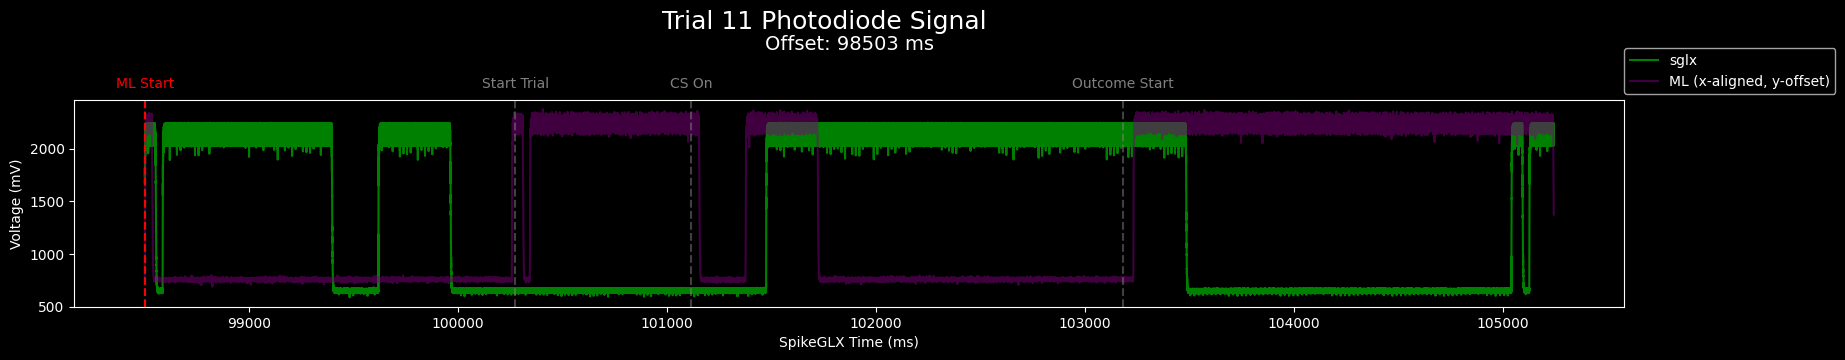

Trial 11:
  ML Cam Start           |  1      
  ML Cam End             |  6735   
  ML Cam Num Frames      |  809    
  --------------------------------------
  SpikeGLX Trial Start   |  98503.04
  SpikeGLX Trial End     |  105244.04
  SpikeGLX Num Frames    |  809    
  Trial 13 Correlation: 0.043


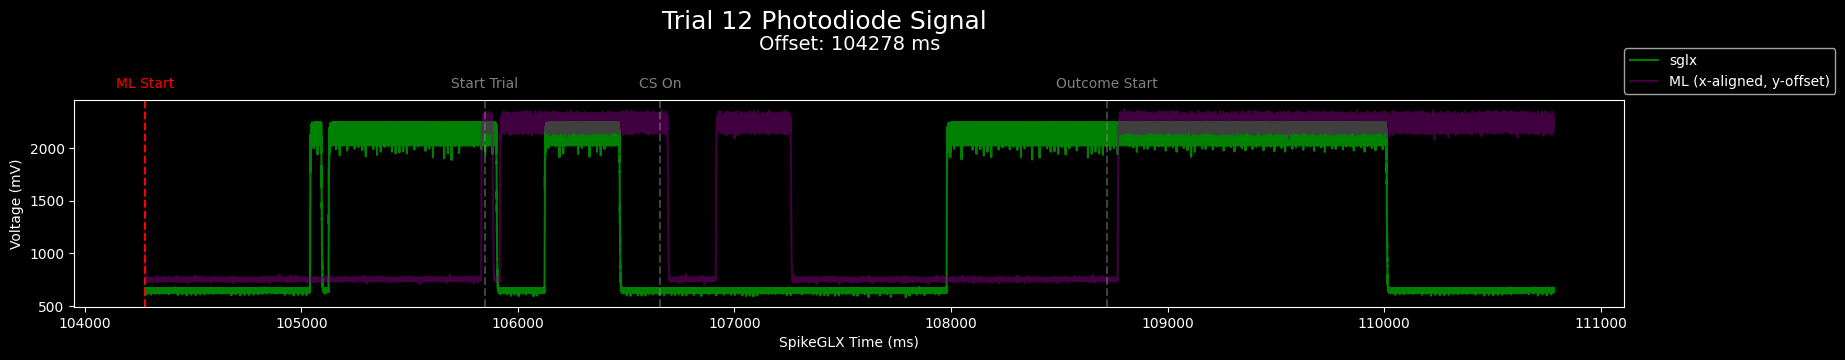

Trial 12:
  ML Cam Start           |  2      
  ML Cam End             |  6502   
  ML Cam Num Frames      |  781    
  --------------------------------------
  SpikeGLX Trial Start   |  104277.6
  SpikeGLX Trial End     |  110784.6
  SpikeGLX Num Frames    |  781    


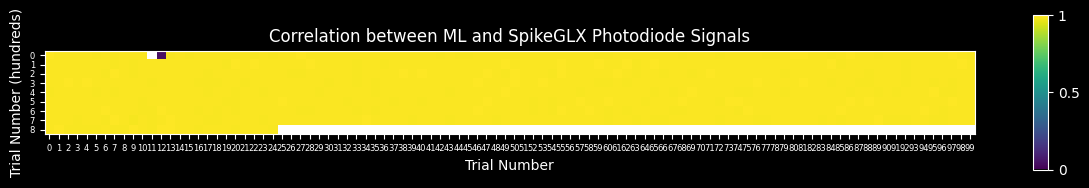

In [13]:
def align_sglx_ml(df, spikeglx_obj, epochs):
	"""
	Aligns the camera save signal from ML to the camera save signal from sglx
	only for the first trial. This is done by finding the offset between the two
	signals and then shifting the ML signal by that amount.
	"""
	# get data from SpikeGLX object
	sample_rate = spikeglx_obj.sample_rate
	sample_times = spikeglx_obj.sample_times
	sglx_trial_times = spikeglx_obj.trial_times
	sglx_cam_framenumbers = spikeglx_obj.cam_framenumbers
	sglx_photodiode = spikeglx_obj.photodiode

	# initialize correlation matrix
	corr_row_len = 100
	correlation_matrix = np.zeros((int(math.ceil(len(df)/corr_row_len)), corr_row_len))

	# loop through all trials
	for trial_num_specified in range(len(df)):

		trial_specified = session_df.iloc[trial_num_specified]
		
		# if True, plot the camera save signal from ML and SpikeGLX
		low_corr_flag = False
		# V to mV
		ml_pd = trial_specified['photodiode']*1000
		if trial_num_specified == 0:
			# estimate the first 10 seconds of acquisition
			sglx_trial_start_approx = 0
			sglx_trial_end_approx = 10000
		else:
			# add 200 ms to the end of the last trial to get the start of the next trial
			sglx_trial_start_approx = sglx_trial_times[trial_num_specified-1]['end'] + 500
			sglx_trial_end_approx = sglx_trial_start_approx + len(ml_pd)
		
		# capture SpikeGLX photodiode signal between approximated trial start and end times
		sglx_pd_signal_approx, sglx_pd_times_approx = \
			time_to_samples(sglx_photodiode, sample_rate, sample_times, 
										sglx_trial_start_approx, 
										sglx_trial_end_approx)

		# find first time where pd signal goes high on sglx
		sglx_pd_high = 0
		for i, x in enumerate(sglx_pd_signal_approx):
			if i == 0:
				continue
			if sglx_pd_signal_approx[i-1] < 2000 and x > 2000:
				# get data_times corresponding to save_high_ephys
				sglx_pd_high_time = sglx_pd_times_approx[i]
				break
		# find first time where save signal goes high on ML
		ml_pd_high = 0
		for i in range(1, len((ml_pd))):
			if ml_pd[i-1] < 1000 and ml_pd[i] > 1000:
				ml_pd_high = i
				break

		# sglx_trial_start is set to the difference between the save_high times
		sglx_trial_start = sglx_pd_high_time - ml_pd_high
		sglx_trial_times[trial_num_specified]['start'] = sglx_trial_start
		# sglx_trial_end is sglx_trial_start + length of any ml analog signal (i.e. pd)
		sglx_trial_end = sglx_trial_start + len(ml_pd)
		sglx_trial_times[trial_num_specified]['end'] =  sglx_trial_end

		# add epoch times to dictionary
		for e_index, epoch in enumerate(epochs):
			sglx_trial_times[trial_num_specified][epoch] = sglx_trial_start + trial_specified[epoch]

		# calculate correlation between ML and sglx pd signals
		sglx_pd_signal_exact, sglx_pd_times_exact = \
			time_to_samples(sglx_photodiode, sample_rate, sample_times, 
											sglx_trial_start, sglx_trial_end)
		sglx_pd_signal_ml_sampled = [sglx_pd_signal_exact[int(i*sample_rate/1000)] 
																	for i in range(len(ml_pd))]

		# calculate correlations between ML and SGLX photodiode signals
		corr = np.corrcoef(ml_pd, sglx_pd_signal_ml_sampled)[0, 1]
		correlation_matrix[trial_num_specified//corr_row_len, trial_num_specified%corr_row_len] = corr
		if corr < 0.9:
			print(f'  Trial {trial_num_specified+1} Correlation: {round(corr, 3)}')
			low_corr_flag = True

		# find the camera frames between the start and end of the trial
		sglx_cam_framenumbers = spikeglx_cam_frames_window(trial_num_specified, sglx_trial_times, sglx_cam_framenumbers, 
																													col_start='start', col_end='end')
		sglx_cam_framenumbers = spikeglx_cam_frames_window(trial_num_specified, sglx_trial_times, sglx_cam_framenumbers, 
																													col_start='Trace Start', col_end='Outcome Start')
	
		# plot trial if correlation between ML and SGLX photodiode signal is low
		if low_corr_flag and trial_num_specified < 150:
			plot_pd_alignment(trial_specified, sglx_pd_times_exact, sglx_pd_signal_exact,
										 sglx_trial_times, sglx_cam_framenumbers, sglx_trial_start, epochs)
	
	# plot correlation matrix
	plot_spikeglx_ml_corr(correlation_matrix, corr_row_len)
	spikeglx_obj.trial_times = sglx_trial_times
	spikeglx_obj.cam_framenumbers = sglx_cam_framenumbers

	return spikeglx_obj

spikeglx_obj = \
	align_sglx_ml(session_df, spikeglx_obj, epochs)

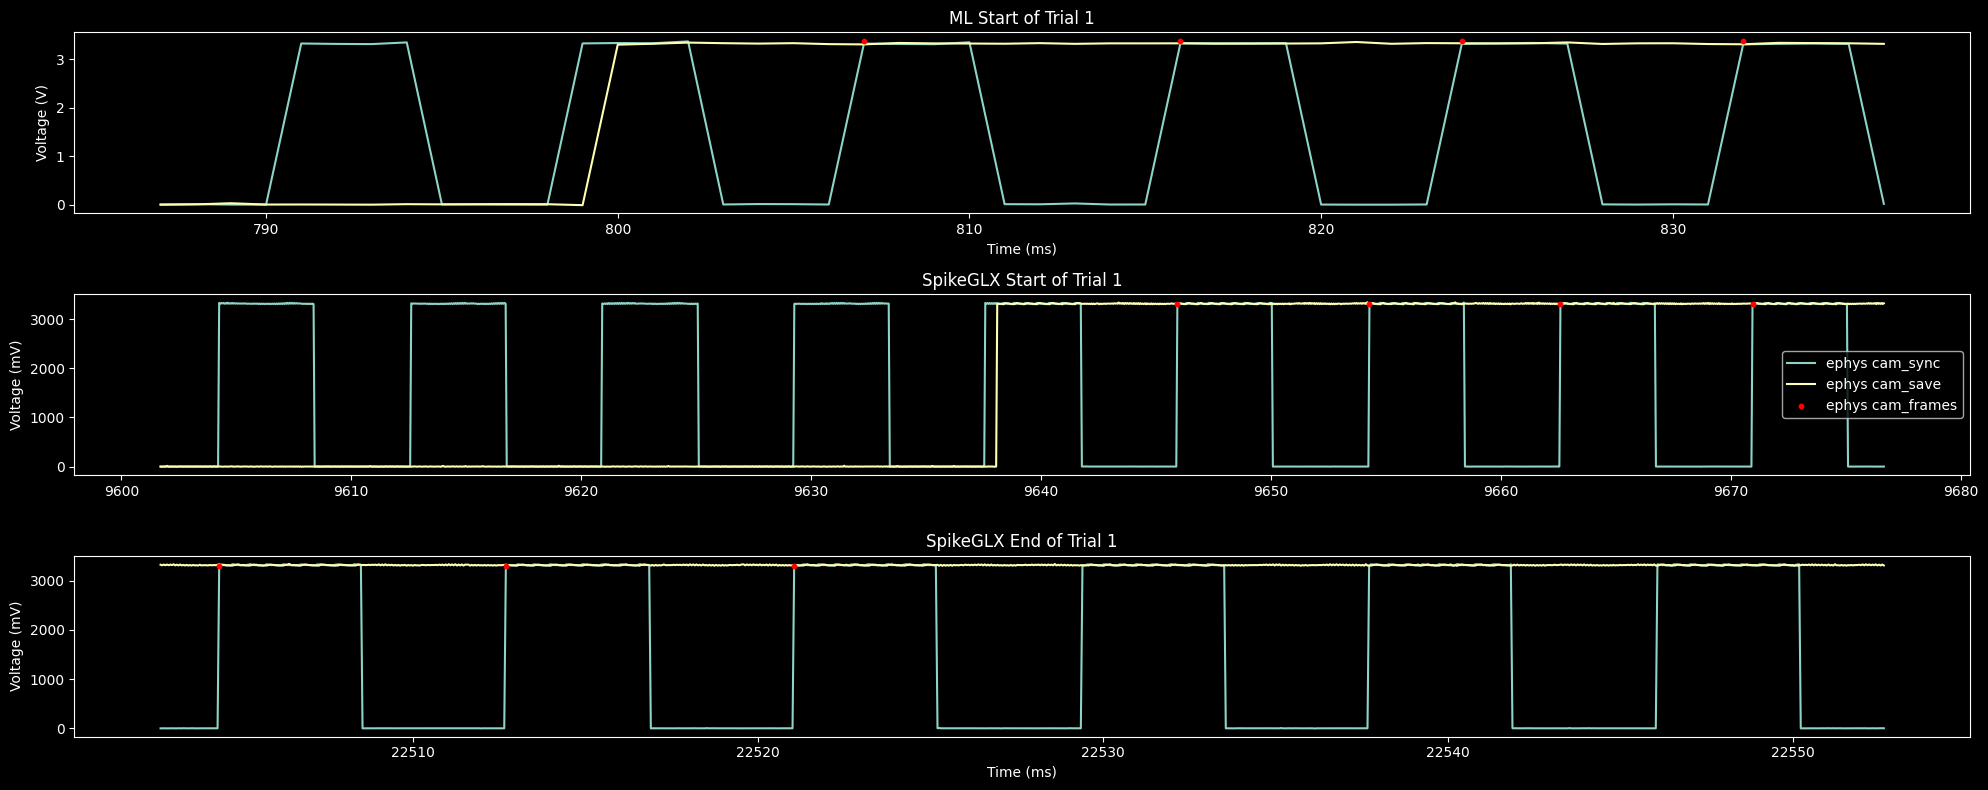

In [14]:
from spike_glx import read_SGLX

# plot first trial to see alignment
read_SGLX.plot_trial_0(session_df, spikeglx_obj)


In [26]:
import pickle
# pickle spikeglx_obj
with open('spikeglx_obj.pkl', 'wb') as f:
  # get info on size of pickle file
  print('Pickle file size: {} MB'.format(sys.getsizeof(pickle.dumps(spikeglx_obj))/1000000))
  # dump pickle file
  pickle.dump(spikeglx_obj, f)

Pickle file size: 4171.963748 MB


In [95]:
from video.video_parsing_external import parse_wm_videos

kwargs = {'spikeglx_obj': spikeglx_obj, 
          'session_obj': session_obj, 
          'trial_start': 0,
          'trial_end': len(session_obj.df),
          'epoch_start': 'Trace Start', 
          'epoch_end': 'Outcome Start', 
          'thread_flag': False}

parse_wm_videos(**kwargs)

0 825
Parsing Trials for Videos: 0 - 825
Video File Source:  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230928_Bear/230928_Bear_143420/e3v831b-20230928T143418-145419.avi
  Frame Count  : 144122
  Frame Rate   : 120
  Frame Size   : 640 x 480
  Videos saved to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928
Trial: 0
 Number of Frames: 182


  0%|          | 0/182 [00:00<?, ?it/s]

In [25]:
# pickle session_obj
with open('session_obj.pickle', 'wb') as f:
  # get info on size of pickle file
  print('Pickle file size: {} MB'.format(sys.getsizeof(pickle.dumps(session_obj))/1000000))

AttributeError: Can't pickle local object 'Session.__init__.<locals>.<lambda>'

##### Additional Checks on SpikeGLX and MonkeyLogic Signals

In [22]:
def check_save_low(trial):
  # check if save signal is low for the entire trial
  cam_save_signal = trial['cam_save']
  if min(cam_save_signal) < 1:
    return 1
  else:
    return 0

session_df['save_low'] = session_df.apply(check_save_low, axis=1)
session_df_save_low = session_df[session_df['save_low'] == 1]
session_df_save_low

date  session_num subject  trial_num  block  condition  correct   
0     230823            0    Bear          1      1          1        1  \
1175  230823            0    Bear       1176      3          1        0   

      error  error_type                            behavioral_code_markers   
0         0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...  \
1175      1           4              [9, 100, 101, 102, 103, 104, 113, 18]   

                                  behavioral_code_times stimuli_name_1   
0     [2.4434999795630574, 2683.249199995771, 2758.8...     _fractal_E  \
1175  [1499.5504000689834, 2023.2500000856817, 2059....     _fractal_E   

     x_1_pos y_1_pos stimuli_name_2 x_2_pos y_2_pos  reward_1  reward_prob_1   
0      [0.0]   [0.0]     _fractal_E   [0.0]   [0.0]         0            0.0  \
1175  [-5.0]   [0.0]     _fractal_B   [5.0]   [0.0]         0            0.0   

      reward_mag_1  reward_drops_1  reward_length_1  reward_2  reward_prob_2   
0              0.0             0.0              0.0         0            0.0  \
1175           0.0             0.0              0.0         1            1.0   

      reward_mag_2  airpuff_1  airpuff_prob_1  airpuff_mag_1  airpuff_2   
0              0.0          1             1.0            1.0          0  \
1175           0.5          1             1.0            1.0          0   

      airpuff_prob_2  airpuff_mag_2   
0                0.0            0.0  \
1175             0.0            0.0   

                                                  eye_x   
0     [0.3837927274645099, 0.3488228358465353, 0.326...  \
1175  [2.7830506625167355, 2.7827892141782744, 2.782...   

                                                  eye_y   
0     [-23.279286196137598, -23.292553527212718, -23...  \
1175  [0.662474635928571, 0.6676008057140879, 0.6676...   

                                              eye_pupil   
0     [6614.0, 6627.0, 6630.0, 6630.0, 6648.0, 6648....  \
1175  [6350.0, 6344.0, 6344.0, 6344.0, 6344.0, 6344....   

                                                   lick   
0     [0.005924517546271019, 0.0046092086426844925, ...  \
1175  [0.0006632819249543231, 0.008226308124759552, ...   

                                               cam_sync   
0     [0.0062533447719864965, 0.003951554190456064, ...  \
1175  [0.004280381416606555, 0.004280381416606555, 0...   

                                               cam_save   
0     [5.627470980623661e-06, -0.003940299258992308,...  \
1175  [3.327409020206122, 3.310967630531658, 3.33365...   

                                             photodiode   trial_start   
0     [0.5626289276034616, 0.5606559647644569, 0.550...  0.000000e+00  \
1175  [2.1110760502211527, 2.0482700402587395, 2.193...  6.957404e+06   

         trial_end    trial_datetime_start      trial_datetime_end   
0     1.081300e+04 2023-08-23 13:12:59.796 2023-08-23 13:13:10.609  \
1175  6.962143e+06 2023-08-23 15:08:57.201 2023-08-23 15:09:01.940   

      reinforcement_trial  choice_trial  stim_chosen  stim_2_chosen   
0                       1             0            5              0  \
1175                    0             1            5              2   

     fractal_chosen  reward  reward_mag  airpuff  airpuff_mag   
0        _fractal_E       0         0.0        1          1.0  \
1175         _error       0         0.0        0          0.0   

      cam1_trial_name  cam2_trial_name  cam1_trial_time  cam2_trial_time   
0                 NaN              NaN              NaN              NaN  \
1175              NaN              NaN              NaN              NaN   

      cam1_video  cam2_video  Start Trial  Fixation On Fixation Success CS On   
0            NaN         NaN         2683         2758             3531  3560  \
1175         NaN         NaN         2023         2059             2887  2902   

     Fixation Off Trace Start Trace End Outcome Start Reward Trigger   
0            3794        4195      5683     

In [65]:
# base case, working
def generate_behavior_frames(session_df, session_obj, trial_num):
	monkey_name = session_obj.monkey
	date = session_obj.date
	session_name = f'{monkey_name}_{date}'
	trial_specified = session_df.iloc[trial_num]
	eye_x = trial_specified['eye_x']
	eye_y = trial_specified['eye_y']
	lick = trial_specified['lick']
	
	fig_folder_path = os.path.join(os.getcwd(), 'video', session_name, f'trial_{trial_num}')
	os.makedirs(fig_folder_path, exist_ok=True)
	for i in tqdm(range(len(eye_x)), desc=f'Trial {trial_num}'):
		# eye position
		plt.figure()
		plt.scatter(eye_x[:i], eye_y[:i], c=np.arange(len(eye_x[:i])), cmap='viridis', s=1)
		plt.colorbar()
		plt.xlim(-40, 40)
		plt.ylim(-40, 40)
		plt.xlabel('Eye X Position')
		plt.ylabel('Eye Y Position')
		plt.title('Trial {}'.format(trial_num))
		plt.savefig(os.path.join(fig_folder_path, "eye_%04d.png" % i), dpi=150)
		plt.close()

		# lick
		plt.figure()
		plt.plot(lick[:i])
		plt.xlabel('Time (ms)')
		plt.ylabel('Voltage (mV)')
		plt.title('Lick')
		plt.xlim(0, len(lick))
		plt.ylim(0, 5)
		plt.savefig(os.path.join(fig_folder_path, "lick_%04d.png" % i), dpi=150)
		plt.close()

Trial [5, 6]:   0%|          | 0/2 [00:00<?, ?it/s]

ValueError: setting an array element with a sequence.

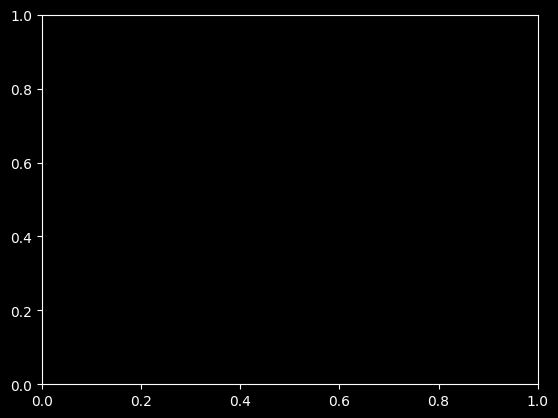

In [66]:
def generate_frames_threading(session_df, session_obj, trials_selected):
	print('Generating frames for trials:')
	threads = []
	for trial_num in trials_selected:
		thread = threading.Thread(target=generate_behavior_frames, args=(session_df, session_obj, trial_num))
		threads.append(thread)
		thread.start()

	# Wait for all threads to finish
	for thread in threads:
			thread.join()
generate_frames(session_df, session_obj, [5, 6])

In [60]:
def generate_video(session_df, session_obj, trials_selected):
	"""Create videos from frames generated from generate_frames()"""
	print('Generating videos for trials:')
	monkey_name = session_obj.monkey
	date = session_obj.date
	session_name = f'{monkey_name}_{date}'

	# get frame size from first trial
	first_trial_folder_path = os.path.join(os.getcwd(), 'video', session_name, f'trial_{trials_selected[0]}')
	first_trial_frame = cv2.imread(os.path.join(first_trial_folder_path, 'file0000.png'))
	frame_height, frame_width, layers = first_trial_frame.shape

	for trial_num in trials_selected:
		trial_specified = session_df.iloc[trial_num]
		beh_measure = ['lick']
		for measure in beh_measure:
			# Define video output settings
			trial_folder = os.path.join(os.getcwd(), 'video', session_name, f'trial_{trial_num}')
			movie_path = os.path.join(trial_folder, f'{measure}_movie_{trial_num}.mp4')
			fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
			video = cv2.VideoWriter(movie_path, fourcc, 1000, (frame_width,frame_height))
			# Combine frames into a video, using tqdm
			video_files = sorted(os.listdir(trial_folder))
			# only include video files that match the measure
			video_files = [file for file in video_files if measure in file]
			for image in tqdm(video_files, desc=f'Trial {trial_num}'):
				video.write(cv2.imread(os.path.join(trial_folder, image)))
				# Delete frames after they are added to the video
				# os.remove(os.path.join(fig_folder, image))
			cv2.destroyAllWindows()
			video.release()

generate_video(session_df, session_obj, [3])

Generating videos for trials:


Trial 3:   0%|          | 0/5853 [00:00<?, ?it/s]

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import threading

def generate_frame(eye_x, eye_y, i, fig_folder_path):
    f, ax = plt.subplots(figsize=(5, 5))
    plt.scatter(eye_x[:i], eye_y[:i], c=np.arange(len(eye_x[:i])), cmap='viridis', s=1)
	   plt.colorbar()
    plt.xlim(-40, 40)
    plt.ylim(-40, 40)
    plt.savefig(os.path.join(fig_folder_path, "file%04d.png" % i))
    plt.close()

def generate_frames(session_df):
    trial_specified = session_df.iloc[0]
    eye_x = trial_specified['eye_x'][:10]
    eye_y = trial_specified['eye_y'][:10]
    fig_folder_path = os.path.join(os.getcwd(), 'figs')
    os.makedirs(fig_folder_path, exist_ok=True)

    threads = []
    for i in range(len(eye_x[:10])):
        thread = threading.Thread(target=generate_frame, args=(eye_x, eye_y, i, fig_folder_path))
        threads.append(thread)
        thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

def generate_video(session_df):

	trial_specified = session_df.iloc[0]

	# Define video output settings
	frame_width = 500
	frame_height = 500
	fig_folder = os.path.join(os.getcwd(), 'figs')
	movie_path = os.path.join(fig_folder, 'scatter_plot_movie.mp4')
	fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
	video = cv2.VideoWriter(movie_path, fourcc, 1000, (frame_width,frame_height))
	# Combine frames into a video, using tqdm
	video_files = sorted(os.listdir(fig_folder))
	for image in video_files:
		video.write(cv2.imread(os.path.join(fig_folder, image)))
		# Delete frames after they are added to the video
		os.remove(os.path.join(fig_folder, image))
	cv2.destroyAllWindows()
	video.release()

generate_frames(session_df)
# generate_video(session_df)

01 1
 0
2 2
3 3
4 4
5 5
67 7
8 8
9 9
 6


In [84]:
# serially: 13m

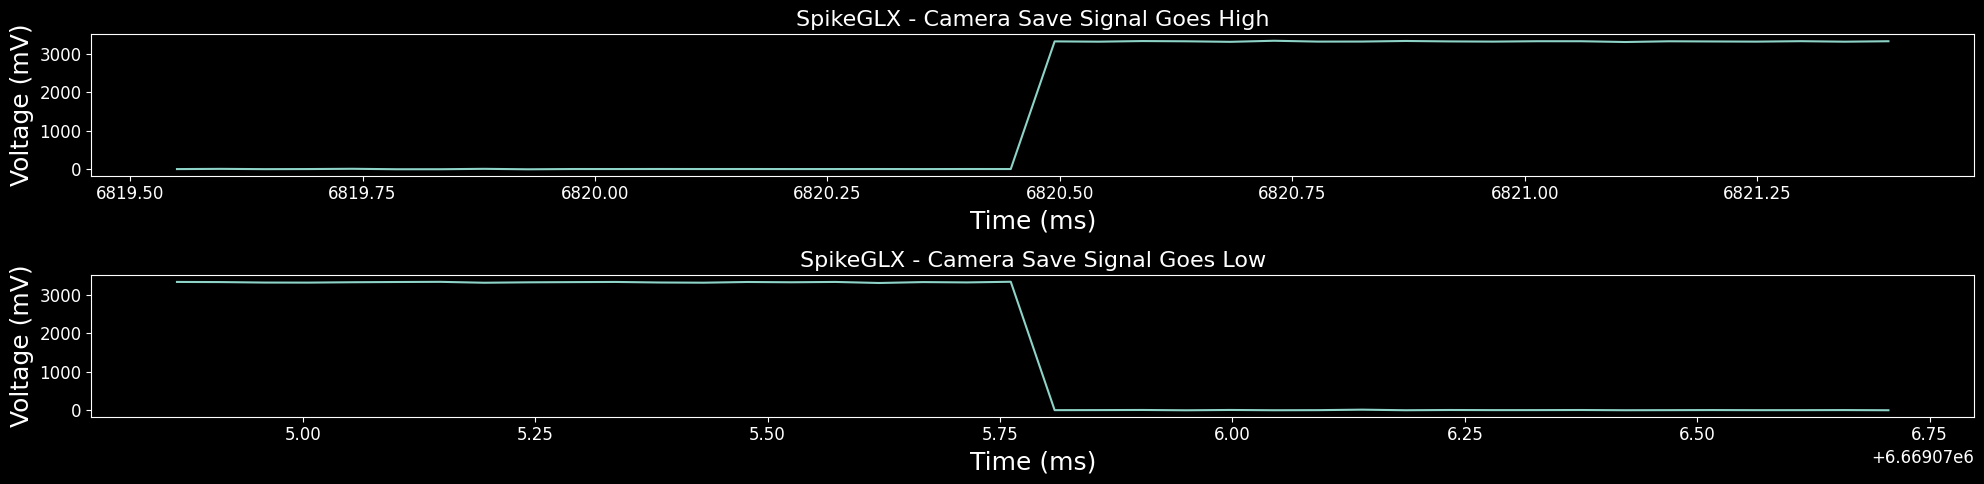

In [55]:
# find all times where chan_dict_corrected[1] < 1000
def _cam_save_goes_high(spikeglx_obj):
	sample_rate = spikeglx_obj.sample_rate
	cam_save = spikeglx_obj.cam_save
	
	cam_save_oneback = np.roll(cam_save, 1)
	cam_save_threshold = np.where(cam_save > 3000)[0]
	cam_save_oneback_threshold = np.where(cam_save_oneback < 3000)[0]
	cam_save_overlap = np.intersect1d(cam_save_threshold, cam_save_oneback_threshold)
	f, axarr = plt.subplots(2, 1, figsize=(20, 5))
	buffer = 20
	x_axis = np.arange(cam_save_overlap[0]-buffer, cam_save_overlap[0]+buffer)/sample_rate*1000
	axarr[0].plot(x_axis,
					cam_save[cam_save_overlap[0]-buffer:cam_save_overlap[0]+buffer])
	axarr[0].set_title('SpikeGLX - Camera Save Signal Goes High')
	axarr[0].set_xlabel('Time (ms)')
	axarr[0].set_ylabel('Voltage (mV)')
	cam_save_threshold = np.where(cam_save < 3000)[0]
	cam_save_oneback_threshold = np.where(cam_save_oneback > 3000)[0]
	cam_save_overlap = np.intersect1d(cam_save_threshold, cam_save_oneback_threshold)
	x_axis = np.arange(cam_save_overlap[0]-buffer, cam_save_overlap[0]+buffer)/sample_rate*1000
	axarr[1].plot(x_axis,
					cam_save[cam_save_overlap[0]-buffer:cam_save_overlap[0]+buffer])
	axarr[1].set_title('SpikeGLX - Camera Save Signal Goes Low')
	axarr[1].set_ylabel('Voltage (mV)')
	axarr[1].set_xlabel('Time (ms)')
	plt.tight_layout()
	plt.show()

_cam_save_goes_high(spikeglx_obj)

***
## Video Analysis

In [112]:
import matplotlib.pyplot as plt
from plot_helper import set_plot_params

def eye_data_delay(row, trace_window):
	delay_end = row['Trace End']
	eye_x = row['eye_x'][delay_end-trace_window:delay_end]
	eye_y = row['eye_y'][delay_end-trace_window:delay_end]
	row['eye_x_delay'] = eye_x
	row['eye_y_delay'] = eye_y
	return row

def eye_outside_threshold(row):
	blink_count_window = row['blink_count_window']
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	try:
		# print(list(zip(eye_x, eye_y, blink_raster)))
		eye_x_threshold = [x for x_index, x in enumerate(eye_x)
												if blink_count_window[x_index] == 1]
		eye_y_threshold = [y for y_index, y in enumerate(eye_y)
												if blink_count_window[y_index] == 1]
	except:
		eye_x_threshold = []
		eye_y_threshold = []
	row['eye_x_threshold'] = eye_x_threshold
	row['eye_y_threshold'] = eye_y_threshold
	return row

def eye_signal_delay(row, session_obj):
	eye_blink_signal = session_obj.blink_signal
	BLINK_SIGNAL = [(eye_blink_signal['eye_x_min'], eye_blink_signal['eye_y_min']),
									(eye_blink_signal['eye_x_max'], eye_blink_signal['eye_y_max'])]
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	blink_count = [1 if (x,y) in BLINK_SIGNAL else 0 
									for (x,y) in zip(eye_x, eye_y)]
	eye_x_threshold = [x for x_index, x in enumerate(eye_x)
											if blink_count[x_index] == 0]
	eye_y_threshold = [y for y_index, y in enumerate(eye_y)
											if blink_count[y_index] == 0]

	row['eye_x_sig'] = eye_x_threshold
	row['eye_y_sig'] = eye_y_threshold

	return row

def plot_eye_data(session_df, session_obj):
	import seaborn as sns

	# trial_numbers = input('Enter trial numbers to plot (e.g. 1,2,3...{}): '.format(len(session_df)))
	# row = session_df.iloc[int(trial_numbers)]
	# trial_numbers = list(row.index)
	COLORS = session_obj.valence_colors
	session_df = session_df.apply(eye_data_delay, 
					trace_window = session_obj.window_blink, axis=1)
	session_df = session_df.apply(eye_outside_threshold, axis=1)
	session_df = session_df.apply(eye_signal_delay, 
															  session_obj=session_obj,
																axis=1)
	for v_index, valence in enumerate(sorted(session_df['valence'].unique(), reverse=True)):
		set_plot_params(FONT=12,
										AXES_TITLE=16,
										AXES_LABEL=18, 
										TICK_LABEL=12, 
										LEGEND=10, 
										TITLE=20)
		f, ax = plt.subplots(1, 1, figsize=(10, 10))
		df = session_df[session_df['valence'] == valence]
		for index, row in df.iterrows():
			x = row['eye_x_delay']
			y = row['eye_y_delay']
			z = list(range(len(row['eye_x_delay'])))
			scatterplot = ax.scatter(x, y, c=z, cmap='viridis', s=1)
		
		eye_x = df['eye_x_delay'].tolist()
		eye_y = df['eye_y_delay'].tolist()
		x_flatten = [item for sublist in eye_x for item in sublist]
		y_flatten = [item for sublist in eye_y for item in sublist]
		# ax2.hist2d(x_flatten, y_flatten, bins=100, cmap='viridis', 
		# 							range=[[-100, 100], [-100, 100]], 
		# 							density=True)
		sns.jointplot(x=x_flatten, 
									y=y_flatten, 
									color=COLORS[v_index],
									xlim = (-100,100),
									ylim = (-100,100))

		ax.set_title('Valence: {}'.format(valence))
		ax.set_xlim([-100, 100])
		ax.set_ylim([-100, 100])
		f.colorbar(scatterplot, ax=ax)

TRIAL_THRESHOLD = 10
# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
session_df_count = session_df_correct[session_df_correct['fractal_count_in_block'] > TRIAL_THRESHOLD]
plot_eye_data(session_df_count, session_obj)

ModuleNotFoundError: No module named 'plot_helper'

In [ ]:
for valence in sorted(session_df_correct['valence'].unique()):

  session_valence = session_df_correct[session_df_correct['valence'] == valence]
  # iterate through trials
  f, axarr = plt.subplots(3, 4, figsize=(10, 5))
  # empty matrix of zeros
  lick_matrix_cs = np.zeros((len(session_valence), 350))
  lick_matrix_trace = np.zeros((len(session_valence), 1000))
  lick_matrix_outcome = np.zeros((len(session_valence), 1000))
  blink_matrix_cs = np.zeros((len(session_valence), 350))
  blink_matrix_trace = np.zeros((len(session_valence), 1000))
  blink_matrix_outcome = np.zeros((len(session_valence), 1000))
  iter = 0
  for index, row in session_valence.iterrows():
    # get lick/blink raster
    lick_raster = row['lick_raster']
    blink_raster = row['blink_raster']
    # get cs on/off time
    cs_on = row['CS On']
    cs_off = row['Trace Start']
    lick_raster_cs = lick_raster[cs_on:cs_off][-350:]
    blink_raster_cs = blink_raster[cs_on:cs_off][-350:]
    # replace zeros in blink matrix with blink raster
    lick_matrix_cs[iter, :len(lick_raster_cs)] = lick_raster_cs
    blink_matrix_cs[iter, :len(blink_raster_cs)] = blink_raster_cs
    # get trace end/trial end time
    if valence > 0:
      trace_end = row['Reward Trigger']
    elif valence < 0:
      trace_end = row['Airpuff Trigger']
    else:
      trace_end = row['Trace End']
    trial_end = row['End Trial']
    lick_trace = lick_raster[cs_off:trace_end][-1000:]
    blink_trace = blink_raster[cs_off:trace_end][-1000:]
    # replace zeros in blink matrix with blink trace
    lick_matrix_trace[iter, :len(lick_trace)] = lick_trace
    blink_matrix_trace[iter, :len(blink_trace)] = blink_trace
    # get outcome time
    lick_raster_outcome = lick_raster[trace_end:trial_end][:1000]
    blink_raster_outcome = blink_raster[trace_end:trial_end][:1000]
    # replace zeros in blink matrix with blink outcome
    lick_matrix_outcome[iter, :len(lick_raster_outcome)] = lick_raster_outcome
    blink_matrix_outcome[iter, :len(blink_raster_outcome)] = blink_raster_outcome
    iter += 1
  axarr[0][0].imshow(lick_matrix_cs, aspect='auto')
  axarr[1][0].imshow(lick_matrix_trace, aspect='auto')
  axarr[2][0].imshow(lick_matrix_outcome, aspect='auto')
  axarr[0][2].imshow(blink_matrix_cs, aspect='auto')
  axarr[1][2].imshow(blink_matrix_trace, aspect='auto')
  axarr[2][2].imshow(blink_matrix_outcome, aspect='auto')
  # get column average of matrix
  ## cs
  lick_matrix_cs_avg = np.mean(lick_matrix_cs, axis=0)
  blink_matrix_cs_avg = np.mean(blink_matrix_cs, axis=0)
  axarr[0][1].plot(lick_matrix_cs_avg)
  axarr[0][1].set_ylim([0, 1])
  axarr[0][3].plot(blink_matrix_cs_avg)
  axarr[0][3].set_ylim([0, 1])
  ## trace
  lick_matrix_trace_avg = np.mean(lick_matrix_trace, axis=0)
  blink_matrix_trace_avg = np.mean(blink_matrix_trace, axis=0)
  axarr[1][1].plot(lick_matrix_trace_avg)
  axarr[1][1].set_ylim([0, 1])
  axarr[1][3].plot(blink_matrix_trace_avg)
  axarr[1][3].set_ylim([0, 1])
  ## outcome
  lick_matrix_outcome_avg = np.mean(lick_matrix_outcome, axis=0)
  blink_matrix_outcome_avg = np.mean(blink_matrix_outcome, axis=0)
  axarr[2][1].plot(lick_matrix_outcome_avg)
  axarr[2][1].set_ylim([0, 1])
  axarr[2][3].plot(blink_matrix_outcome_avg)
  axarr[2][3].set_ylim([0, 1])
  # set x labels
  axarr[0][0].set_title('Lick Raster')
  axarr[0][1].set_title('Lick Average')
  axarr[0][2].set_title('Blink Raster')
  axarr[0][3].set_title('Blink Average')
  # set y labels
  axarr[0][0].set_ylabel('CS')
  axarr[1][0].set_ylabel('Trace')
  axarr[2][0].set_ylabel('Outcome')
  # use super title to set title over all subplots 
  f.suptitle('Valence: {}'.format(valence), fontsize=22)
  # reduce height of title
  f.tight_layout()
  plt.show()

***
## DeepLabCut

In [19]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=Warning)
import deeplabcut

from dlc_primate.dlc_utils import dlc_config
video_path_list = dlc_config.get_trial_video_list(session_df, session_obj.video_path)

Checking for video files...
  Video directory: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos


100%|██████████| 660/660 [00:00<00:00, 41522.16it/s]

Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230717_Aragorn_choice_Cam1_1.mp4
Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230717_Aragorn_choice_Cam1_2.mp4
Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230717_Aragorn_choice_Cam1_3.mp4
Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230717_Aragorn_choice_Cam1_4.mp4
Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230717_Aragorn_choice_Cam1_5.mp4
Video not found: /Users/rahimhashim/Google Drive/My Drive/Columbia/Sal

In [ ]:
from PIL import Image
import cv2

project_name = f'{session_obj.date}_{session_obj.monkey}'
your_name = 'rahim'
model2use = 'primate_face'
# .mp4 or .avi etc.
videotype = os.path.splitext(video_path_list[0])[-1].lstrip('.')

# Check if videos need to be downsampled
downsample_flag = check_for_downsample(video_path_list)

if downsample_flag:
	video_path_list = downsample_videos(video_path_list)

# Create ModelZoo project
config_path, train_config_path = deeplabcut.create_pretrained_project(
    project_name,
    your_name,
    video_path_list[0:1],
    videotype=videotype,
    model=model2use,
    analyzevideo=True,
    createlabeledvideo=True,
    copy_videos=False, # must leave copy_videos=True
)

In [ ]:
# Delete the first video in the config file to rerun with new config
dlc_config.clean_pretrained_project(config_path)

In [ ]:
video_list_subset = video_path_list[:]
# Adding new videos to the config.yaml file
deeplabcut.add_new_videos(config_path, video_list_subset, copy_videos=False, 
            coords=None, extract_frames=False
)

# Analyze specified videos
deeplabcut.analyze_videos(config_path, video_list_subset, 
            videotype, save_as_csv=True
)

# Filter predictions
deeplabcut.filterpredictions(config_path, video_list_subset, videotype=videotype)

# Create labeled videos
deeplabcut.create_labeled_video(
   config_path, video_list_subset, 
   videotype, 
   draw_skeleton=True, 
   filtered=True,
   trailpoints=5,
)

# Plot trajectories
deeplabcut.plot_trajectories(config_path, video_list_subset, videotype, filtered=True)

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheet_name='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data